# Submission Pertama: Menyelesaikan Permasalahan Human Resources

- Nama: Muhammad Rizki
- Email: mrizki135790@gmail.com
- Id Dicoding: rizki_muhammad

## Persiapan

### Menyiapkan library yang dibutuhkan

In [34]:
# ===============================
# LIBRARY IMPORTS
# ===============================

# Built-in libraries
import os
import warnings
import shutil
from google.colab import files

# Core data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import joblib

# Plotting configuration
sns.set(style="whitegrid", palette="husl")
plt.style.use('default')
plt.rcParams['figure.autolayout'] = True

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

# Google Colab (optional)
from google.colab import files

# Scikit-learn: Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Scikit-learn: Model selection
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV
)

# Scikit-learn: Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Scikit-learn: Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, precision_recall_curve
)


### Menyiapkan data yang akan diguankan

In [2]:
dataset = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv"

df = pd.read_csv(dataset)

## Data Understanding

In [3]:
df.head(3)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7


In [4]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   

In [5]:
# Describe numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
df[df.select_dtypes(include=np.number).columns].describe()




Descriptive Statistics for Numerical Columns:


,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Describe categorical columns
print("\nDescriptive Statistics for Categorical Columns:")
df[df.select_dtypes(include='object').columns].describe()


Descriptive Statistics for Categorical Columns:


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


In [7]:
# Check for missing values per column (only those > 0)
missing = df.isnull().sum()
missing = missing[missing > 0]

if not missing.empty:
    print("\nMissing Values:")
    for col, count in missing.items():
        print(f"- {col}: {count}")
else:
    print("\nMissing Values: None")

# Check the number of duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicated Rows: {duplicates}")



Missing Values:
- Attrition: 412

Duplicated Rows: 0


In [8]:
print("=== HR EMPLOYEE ATTRITION - EXPLORATORY DATA ANALYSIS ===\n")
# handle the missing values in Attrition column
print("Missing values in Attrition column:", df['Attrition'].isnull().sum())
print("Unique values in Attrition:", df['Attrition'].unique())

# Convert Attrition to binary
df = df.dropna(subset=['Attrition']).copy()
print(f"Dataset size after removing missing Attrition: {len(df)} rows")

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove EmployeeId and EmployeeCount as they're not meaningful for analysis
if 'EmployeeId' in numeric_cols:
    numeric_cols.remove('EmployeeId')
if 'EmployeeCount' in numeric_cols:
    numeric_cols.remove('EmployeeCount')
if 'StandardHours' in numeric_cols:  # Usually constant
    numeric_cols.remove('StandardHours')

print(f"\nNumeric columns ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

=== HR EMPLOYEE ATTRITION - EXPLORATORY DATA ANALYSIS ===

Missing values in Attrition column: 412
Unique values in Attrition: [nan  1.  0.]
Dataset size after removing missing Attrition: 1058 rows

Numeric columns (24): ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical columns (8): ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']



1. UNIVARIATE ANALYSIS


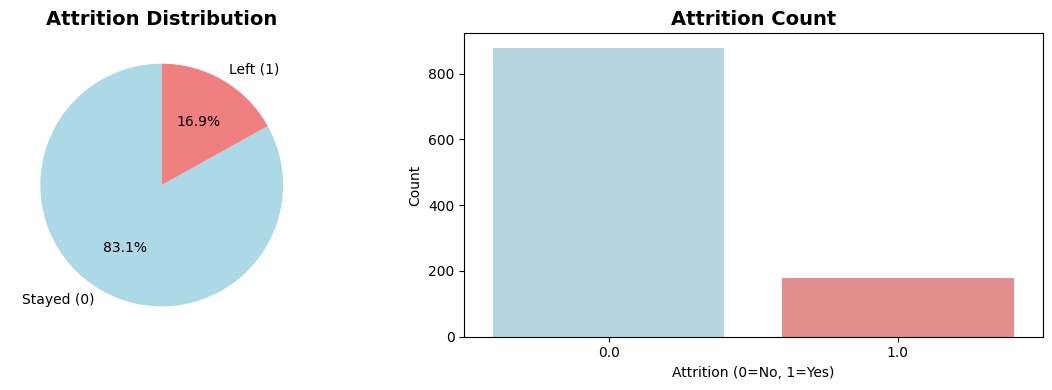

Overall Attrition Rate: 16.92%


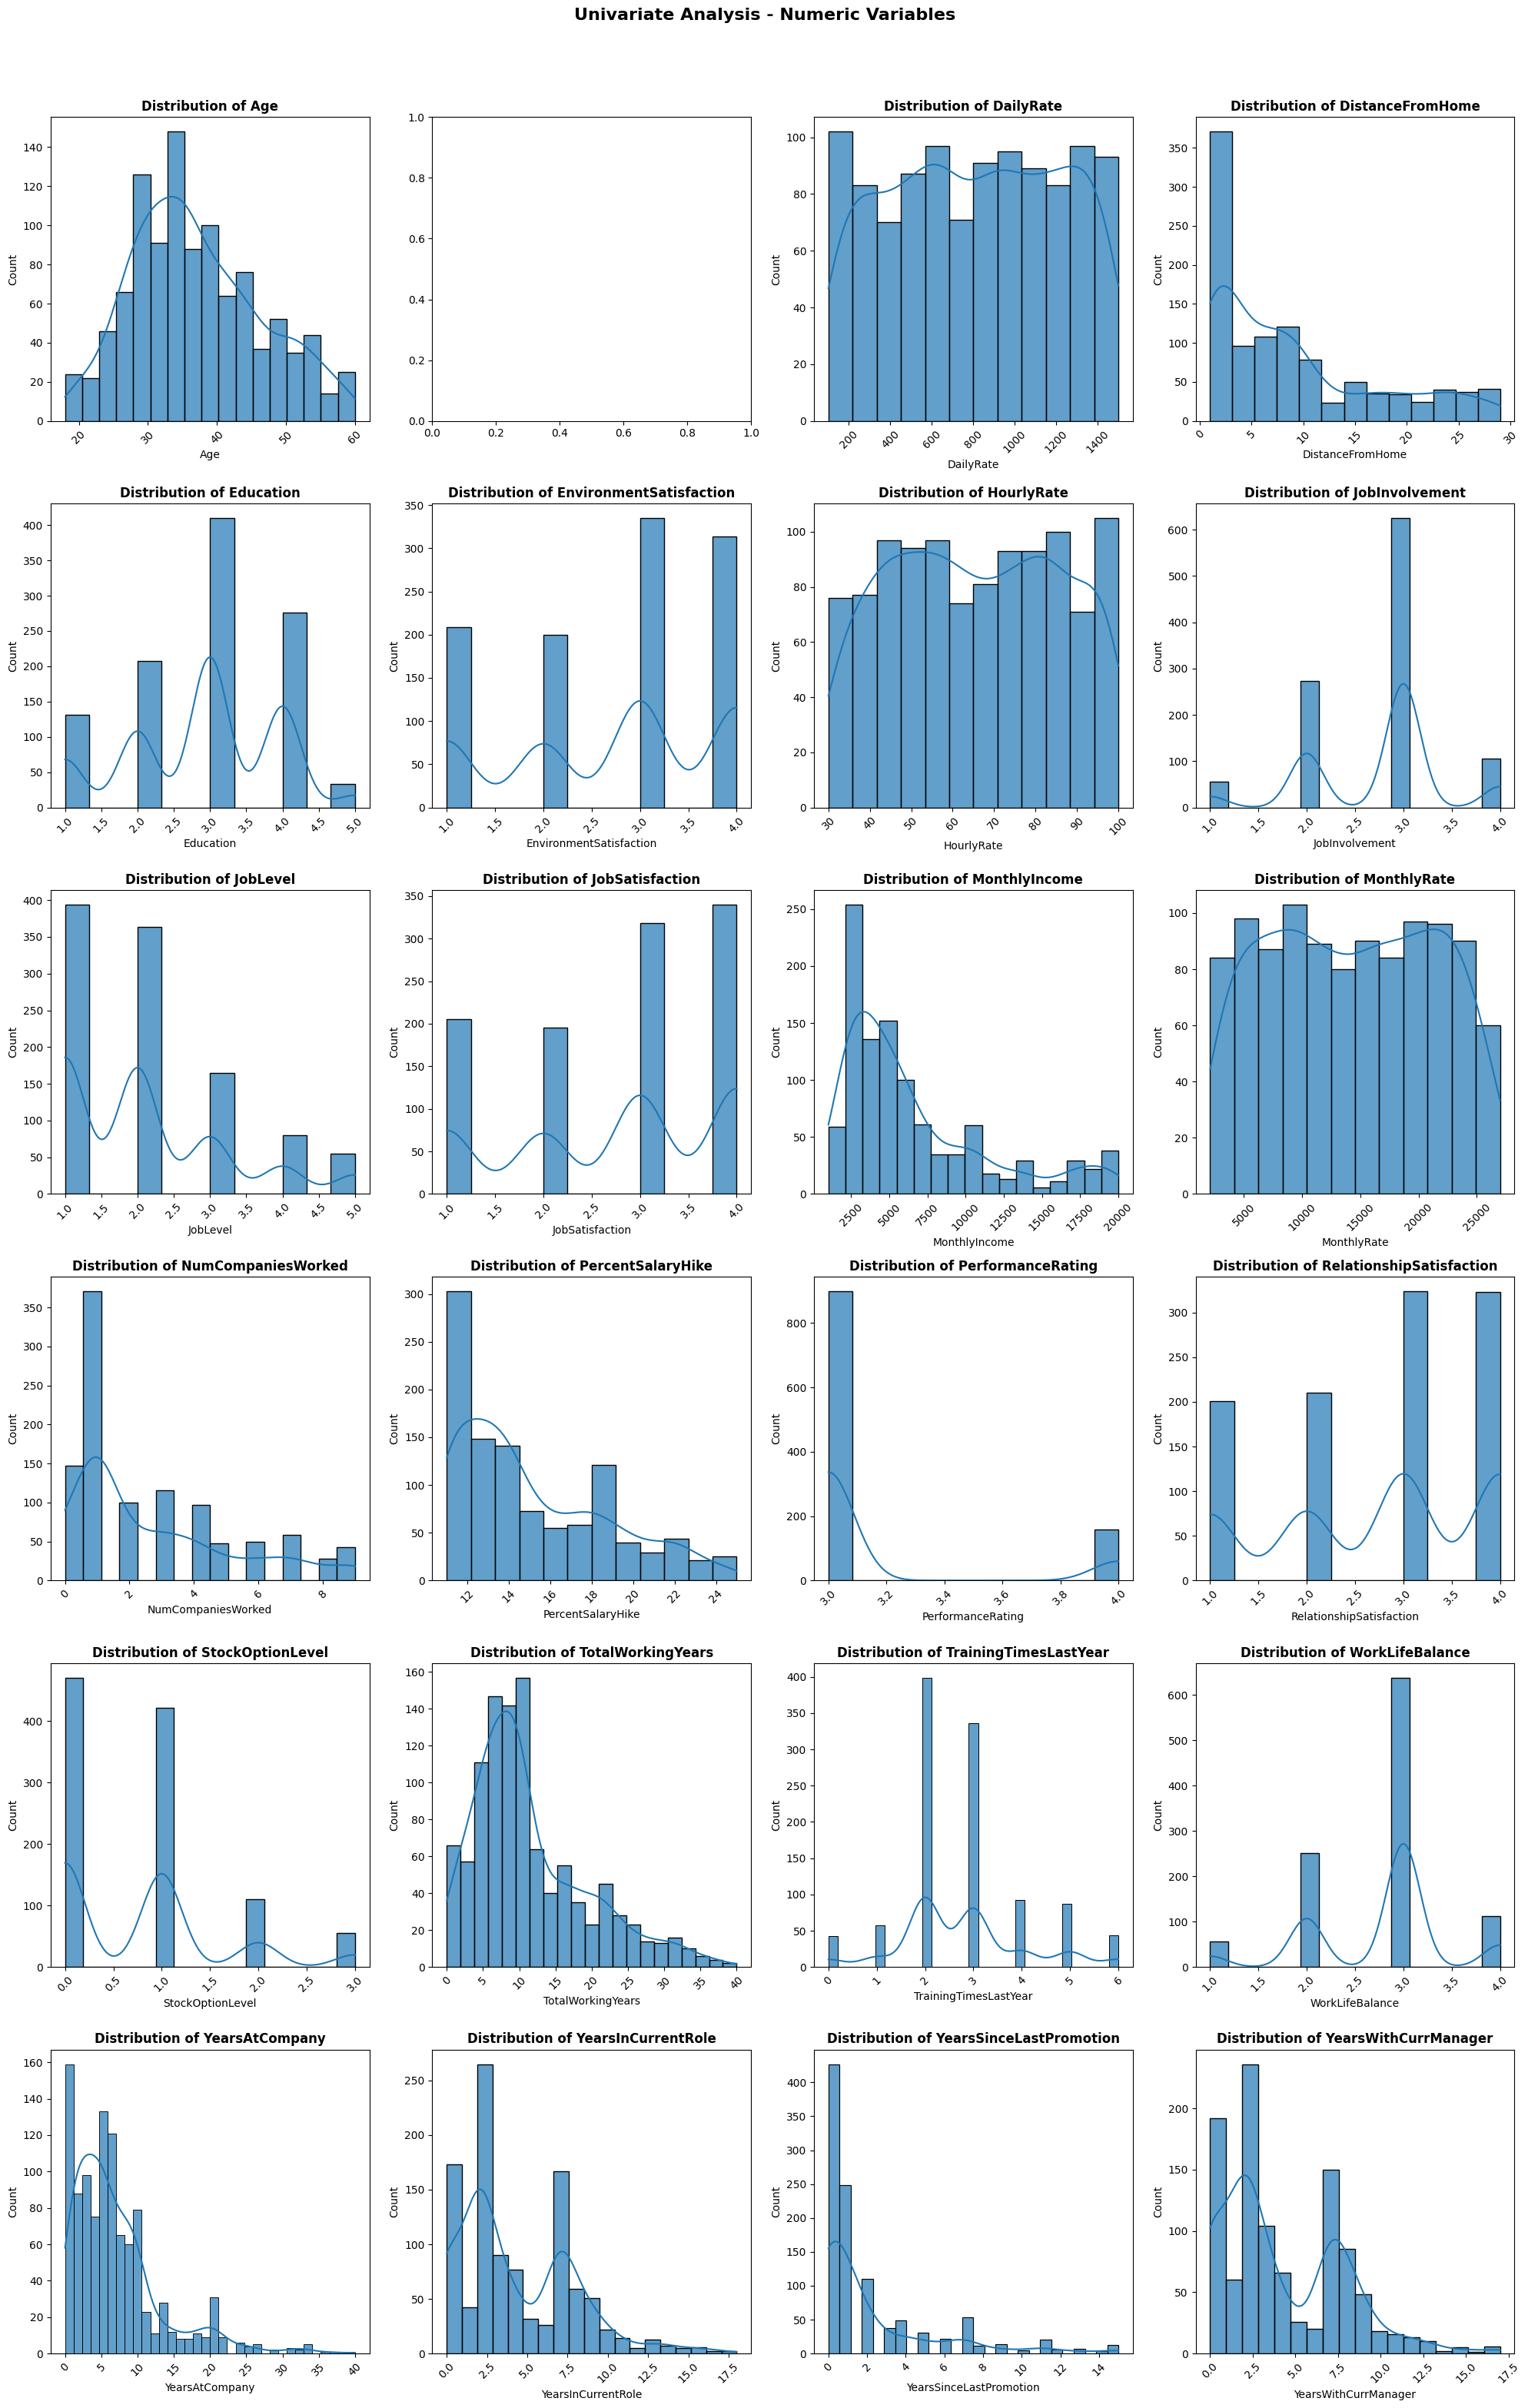

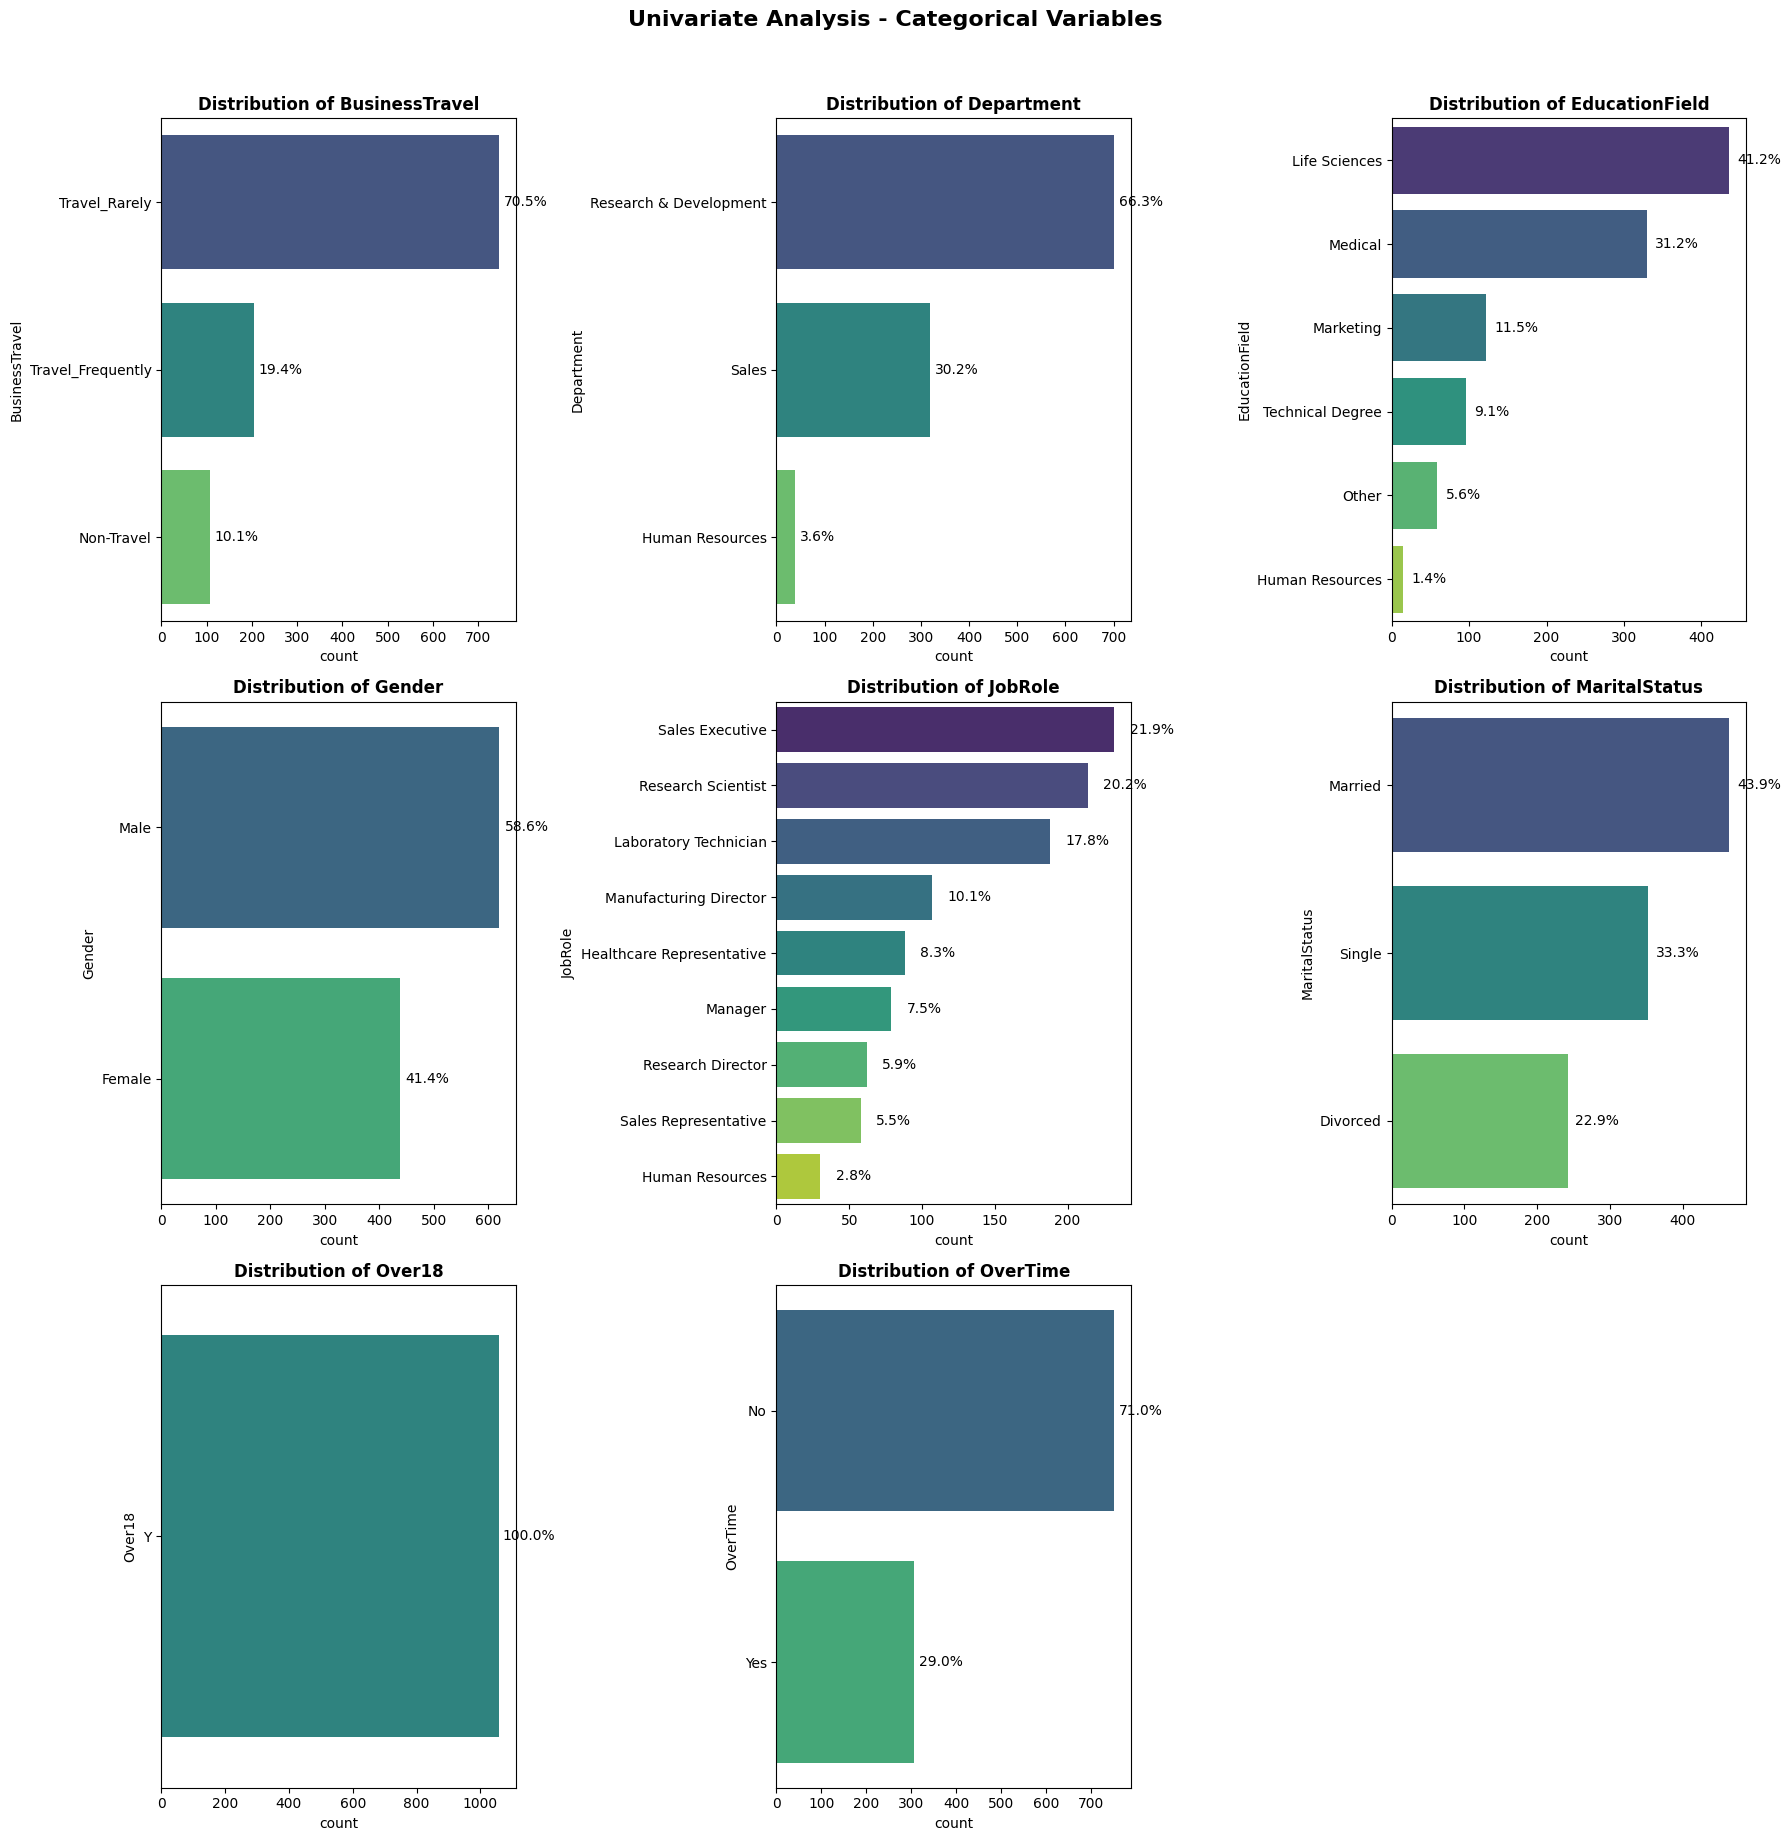

In [9]:
# ===============================
# 1. UNIVARIATE ANALYSIS
# ===============================

print("\n" + "="*50)
print("1. UNIVARIATE ANALYSIS")
print("="*50)

# 1.1 Target Variable Analysis
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
attrition_counts = df['Attrition'].value_counts()
plt.pie(attrition_counts.values, labels=['Stayed (0)', 'Left (1)'], autopct='%1.1f%%',
        colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Attrition Distribution', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Attrition', palette=['lightblue', 'lightcoral'])
plt.title('Attrition Count', fontsize=14, fontweight='bold')
plt.xlabel('Attrition (0=No, 1=Yes)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

attrition_rate = (df['Attrition'].sum() / len(df)) * 100
print(f"Overall Attrition Rate: {attrition_rate:.2f}%")

# 1.2 Numeric Variables Distribution
fig, axes = plt.subplots(nrows=(len(numeric_cols)//4 + 1), ncols=4, figsize=(20, 5*(len(numeric_cols)//4 + 1)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if col != 'Attrition':
        sns.histplot(data=df, x=col, kde=True, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'Distribution of {col}', fontweight='bold')
        axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Univariate Analysis - Numeric Variables', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 1.3 Categorical Variables Distribution
fig, axes = plt.subplots(nrows=(len(categorical_cols)//3 + 1), ncols=3, figsize=(18, 6*(len(categorical_cols)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    sns.countplot(data=df, y=col, order=value_counts.index, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}', fontweight='bold')

    # Add percentage labels
    total = len(df)
    for j, (category, count) in enumerate(value_counts.items()):
        percentage = (count / total) * 100
        axes[i].text(count + total*0.01, j, f'{percentage:.1f}%',
                    va='center', fontsize=10)

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Univariate Analysis - Categorical Variables', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


2. BIVARIATE ANALYSIS - Variables vs Attrition


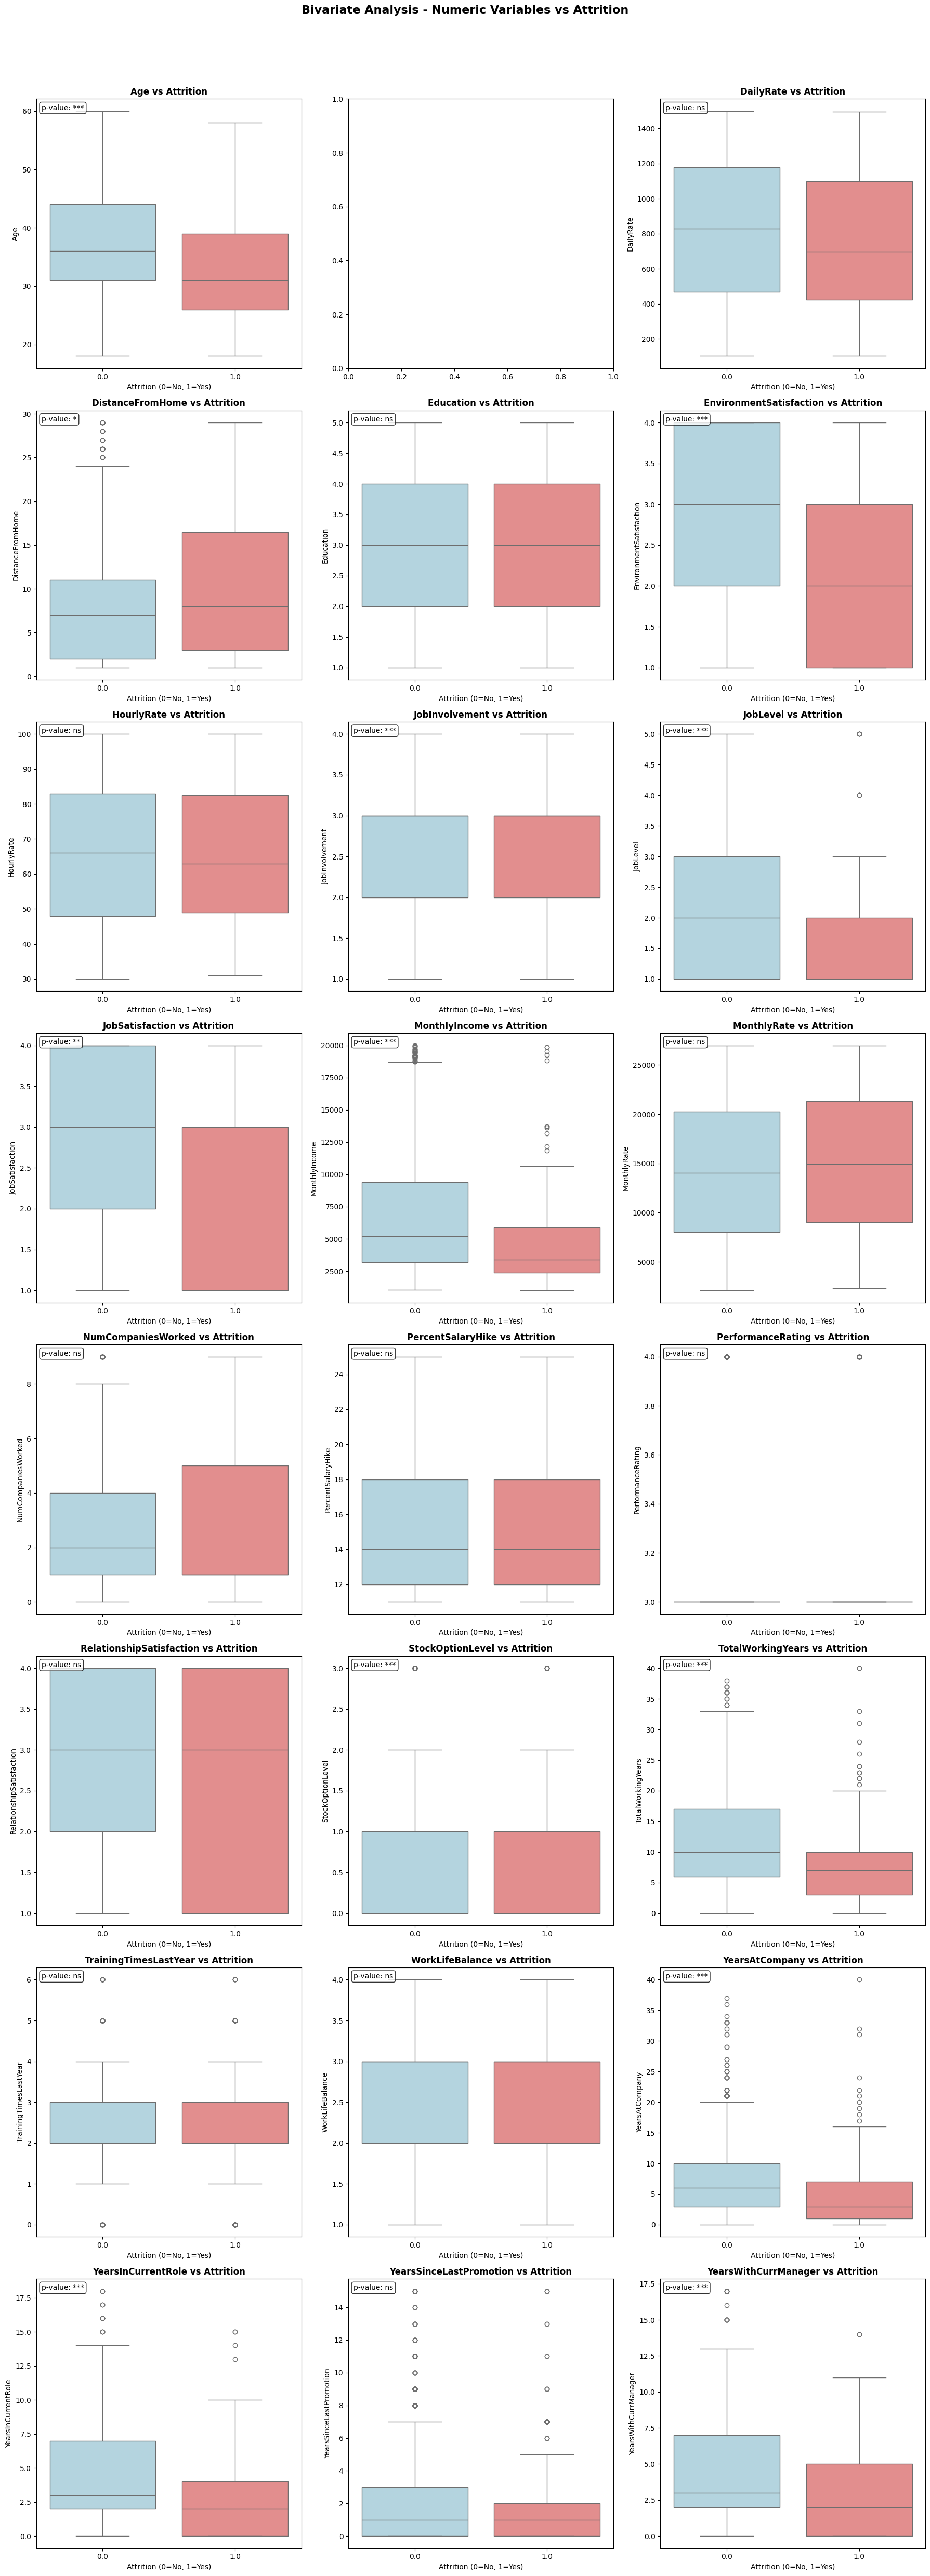

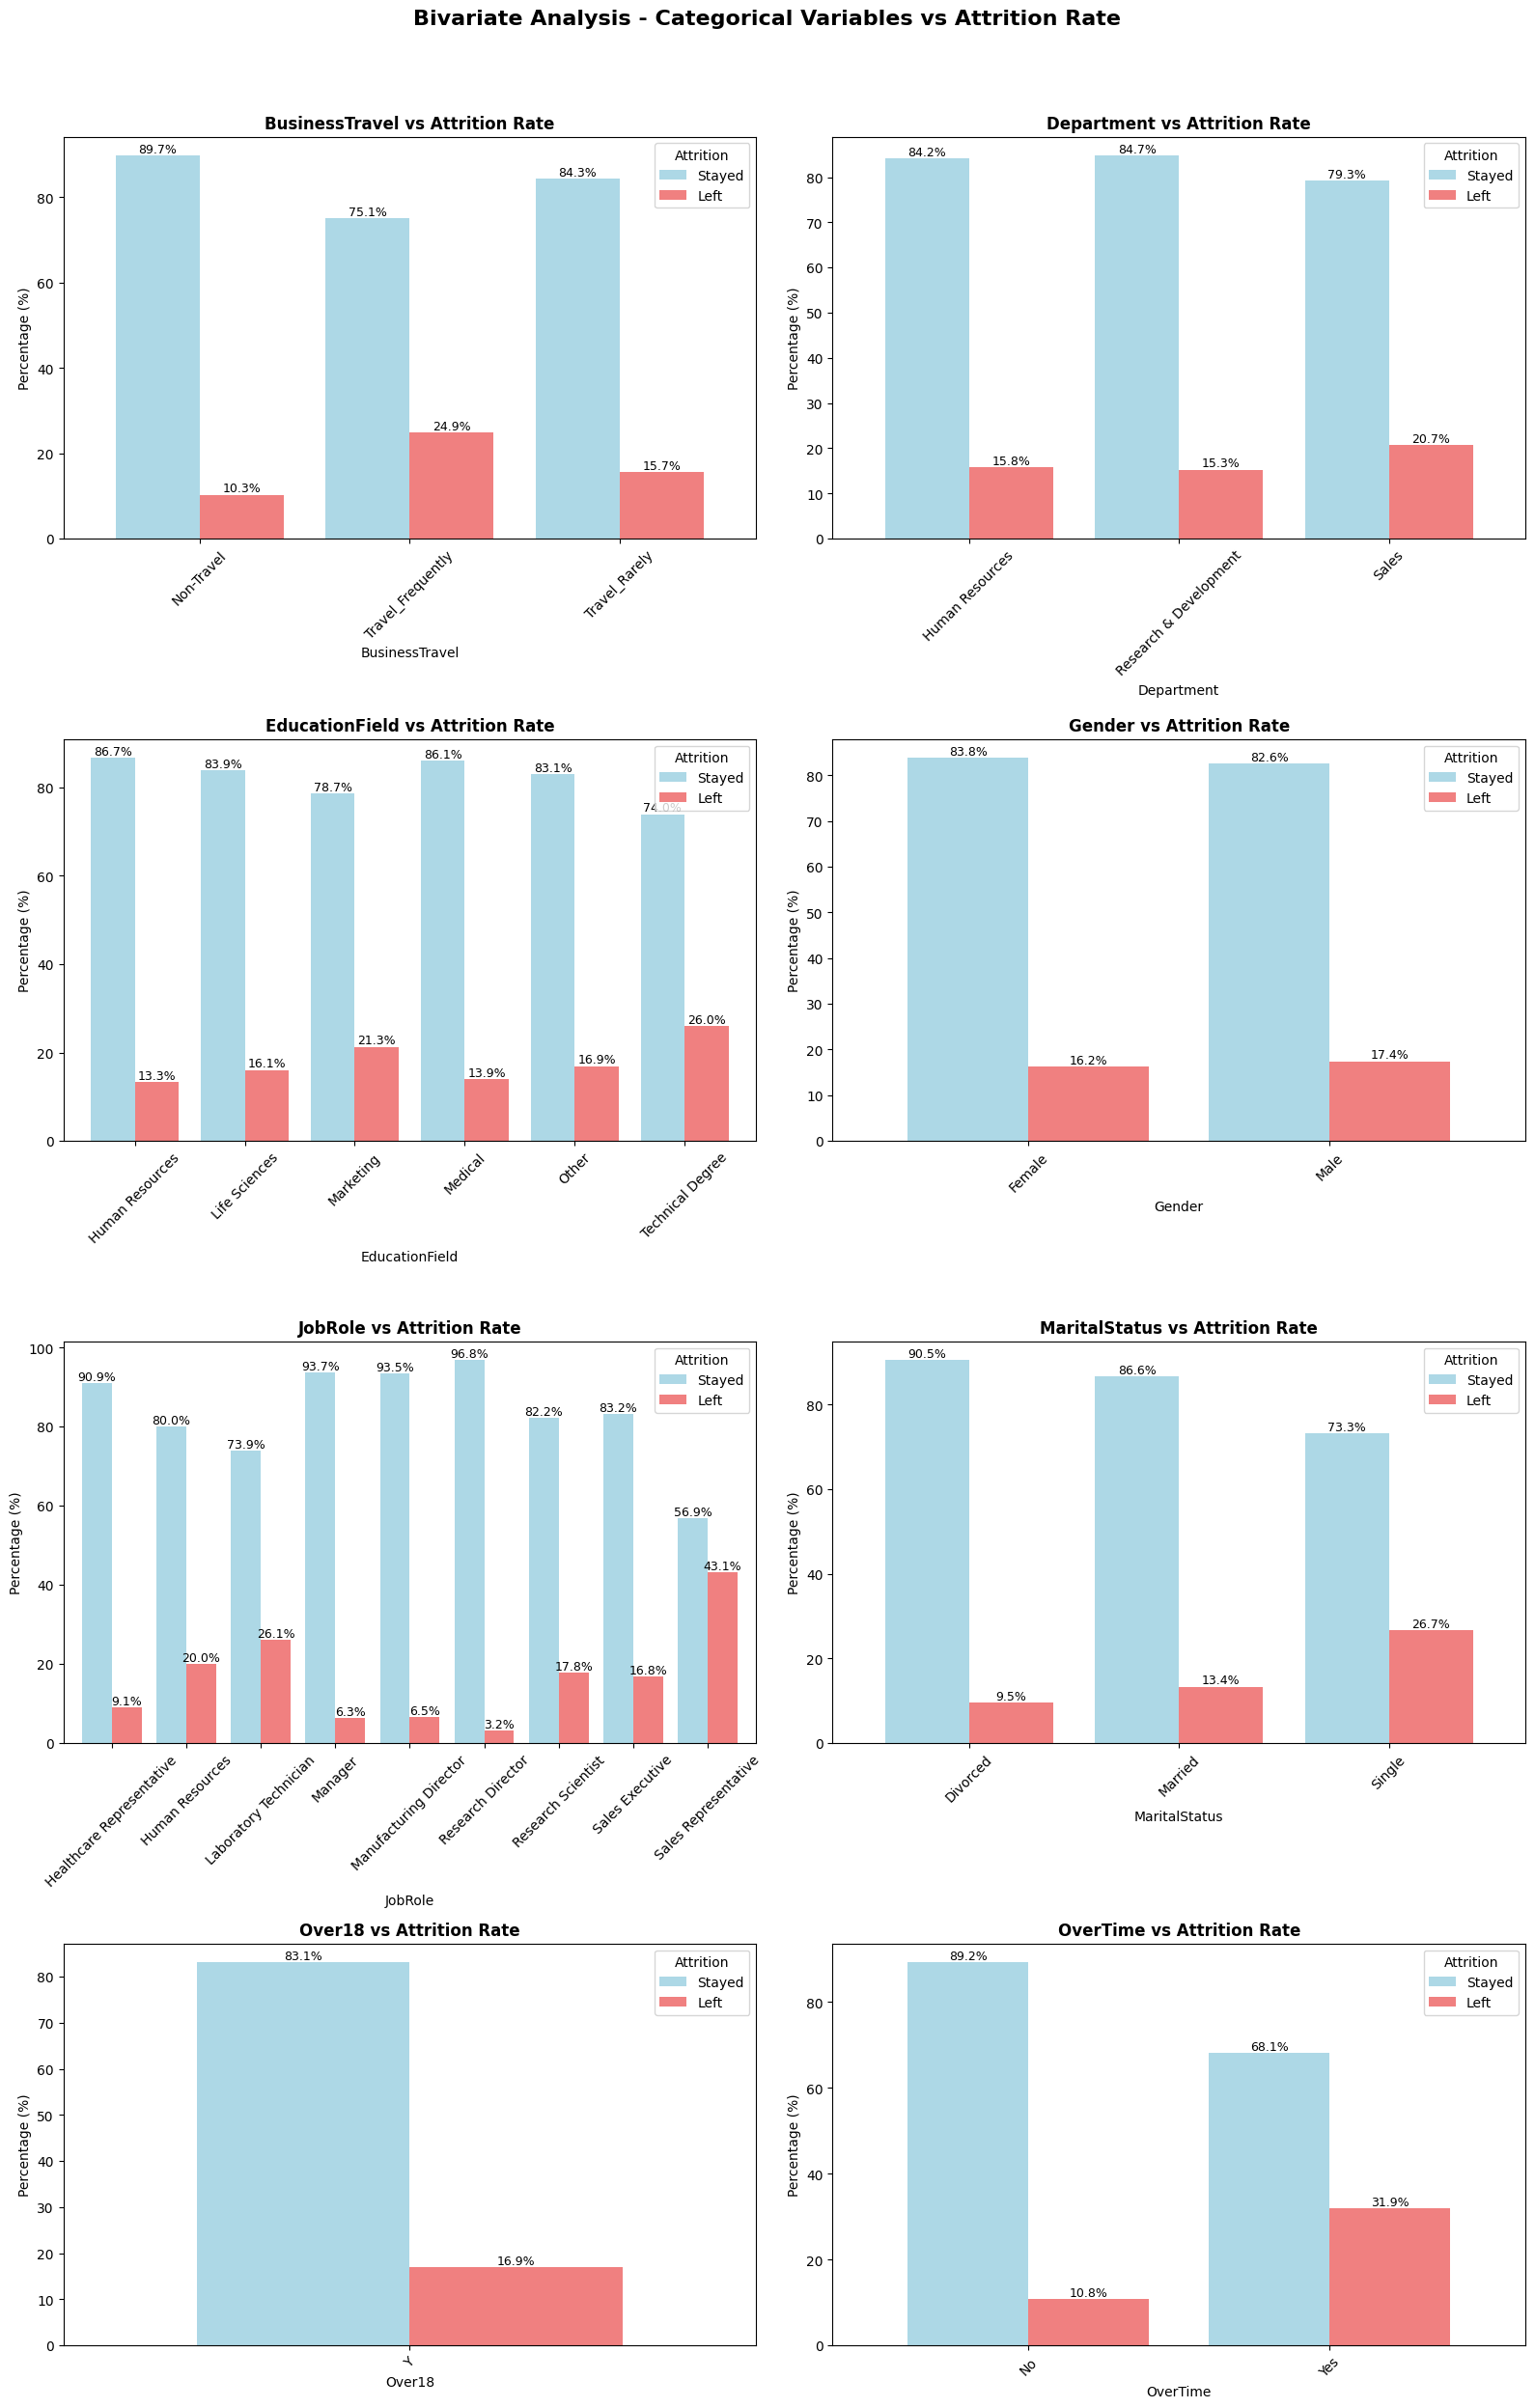

In [10]:
# ===============================
# 2. BIVARIATE ANALYSIS (vs Attrition)
# ===============================

print("\n" + "="*50)
print("2. BIVARIATE ANALYSIS - Variables vs Attrition")
print("="*50)

# 2.1 Numeric Variables vs Attrition
fig, axes = plt.subplots(nrows=(len(numeric_cols)//3 + 1), ncols=3, figsize=(18, 6*(len(numeric_cols)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if col != 'Attrition':
        sns.boxplot(data=df, x='Attrition', y=col, ax=axes[i], palette=['lightblue', 'lightcoral'])
        axes[i].set_title(f'{col} vs Attrition', fontweight='bold')
        axes[i].set_xlabel('Attrition (0=No, 1=Yes)')

        # Add statistical test results
        group_0 = df[df['Attrition'] == 0][col]
        group_1 = df[df['Attrition'] == 1][col]
        stat, p_value = stats.mannwhitneyu(group_0, group_1, alternative='two-sided')
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        axes[i].text(0.02, 0.98, f'p-value: {significance}', transform=axes[i].transAxes,
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Bivariate Analysis - Numeric Variables vs Attrition', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 2.2 Categorical Variables vs Attrition
fig, axes = plt.subplots(nrows=(len(categorical_cols)//2 + 1), ncols=2, figsize=(16, 6*(len(categorical_cols)//2 + 1)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    # Create crosstab
    ct = pd.crosstab(df[col], df['Attrition'], normalize='index') * 100

    ct.plot(kind='bar', ax=axes[i], color=['lightblue', 'lightcoral'], width=0.8)
    axes[i].set_title(f'{col} vs Attrition Rate', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Percentage (%)')
    axes[i].legend(['Stayed', 'Left'], title='Attrition')
    axes[i].tick_params(axis='x', rotation=45)

    # Add percentage labels on bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f%%', fontsize=9)

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Bivariate Analysis - Categorical Variables vs Attrition Rate', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()



3. CORRELATION ANALYSIS


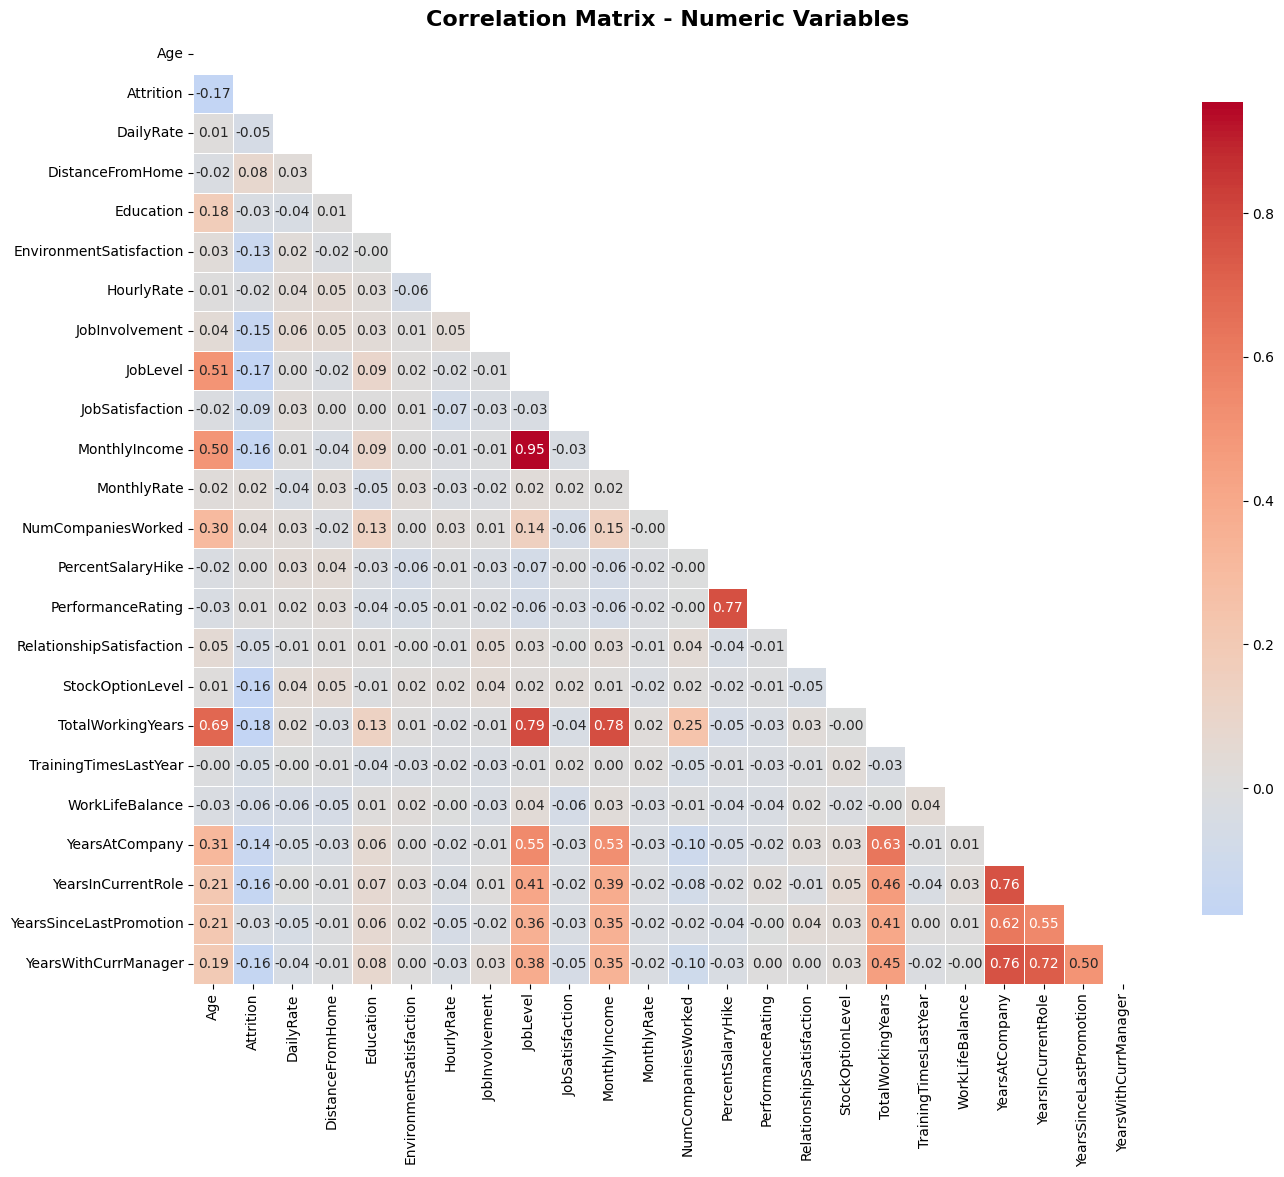


Top correlations with Attrition:
TotalWorkingYears        : -0.177
Age                      : -0.172
JobLevel                 : -0.169
StockOptionLevel         : -0.164
MonthlyIncome            : -0.164
YearsInCurrentRole       : -0.159
YearsWithCurrManager     : -0.156
JobInvolvement           : -0.150
YearsAtCompany           : -0.135
EnvironmentSatisfaction  : -0.133


In [11]:
# ===============================
# 3. CORRELATION ANALYSIS
# ===============================

print("\n" + "="*50)
print("3. CORRELATION ANALYSIS")
print("="*50)

# Correlation matrix for numeric variables
numeric_df = df[numeric_cols]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Correlation Matrix - Numeric Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with Attrition
attrition_corr = correlation_matrix['Attrition'].drop('Attrition').sort_values(key=abs, ascending=False)
print("\nTop correlations with Attrition:")
for var, corr in attrition_corr.head(10).items():
    print(f"{var:25}: {corr:6.3f}")

In [12]:
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"Uninformative column: {col}")


Uninformative column: EmployeeCount
Uninformative column: Over18
Uninformative column: StandardHours


In [13]:
# ===============================
# 4. STATISTICAL SUMMARY
# ===============================

print("\n" + "="*50)
print("4. STATISTICAL SUMMARY")
print("="*50)

# Chi-square tests for categorical variables
print("\nChi-square tests for categorical variables vs Attrition:")
print("-" * 60)
for col in categorical_cols:
    ct = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, dof, expected = stats.chi2_contingency(ct)
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"{col:25}: Chi2={chi2:8.3f}, p-value={p_value:8.6f} {significance}")

# Mann-Whitney U tests for numeric variables
print("\nMann-Whitney U tests for numeric variables vs Attrition:")
print("-" * 60)
for col in numeric_cols:
    if col != 'Attrition':
        group_0 = df[df['Attrition'] == 0][col]
        group_1 = df[df['Attrition'] == 1][col]
        stat, p_value = stats.mannwhitneyu(group_0, group_1, alternative='two-sided')
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"

        median_0 = group_0.median()
        median_1 = group_1.median()
        print(f"{col:25}: U={stat:8.1f}, p-value={p_value:8.6f} {significance} | Med(0)={median_0:6.1f}, Med(1)={median_1:6.1f}")



4. STATISTICAL SUMMARY

Chi-square tests for categorical variables vs Attrition:
------------------------------------------------------------
BusinessTravel           : Chi2=  13.403, p-value=0.001229 **
Department               : Chi2=   4.627, p-value=0.098900 ns
EducationField           : Chi2=   9.812, p-value=0.080755 ns
Gender                   : Chi2=   0.188, p-value=0.664636 ns
JobRole                  : Chi2=  66.394, p-value=0.000000 ***
MaritalStatus            : Chi2=  37.622, p-value=0.000000 ***
Over18                   : Chi2=   0.000, p-value=1.000000 ns
OverTime                 : Chi2=  67.763, p-value=0.000000 ***

Mann-Whitney U tests for numeric variables vs Attrition:
------------------------------------------------------------
Age                      : U=100663.0, p-value=0.000000 *** | Med(0)=  36.0, Med(1)=  31.0
DailyRate                : U= 84992.5, p-value=0.089800 ns | Med(0)= 829.0, Med(1)= 699.0
DistanceFromHome         : U= 69493.5, p-value=0.013450 * 

In [14]:
# export df
df.to_csv('dashborad_df.csv', index=False)
print("\nDataFrame dashborad to dashborad_df.csv")
files.download('dashborad_df.csv')


DataFrame dashborad to dashborad_df.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Preparation / Preprocessing

In [15]:
# Create a copy for preprocessing
df_processed = df.copy()

print(f"Original dataset shape: {df.shape}")
print(f"Missing values in Attrition: {df['Attrition'].isnull().sum()}")

Original dataset shape: (1058, 35)
Missing values in Attrition: 0


In [16]:
# ===============================
# 1. HANDLE MISSING VALUES
# ===============================
print("\n" + "="*50)
print("1. HANDLING MISSING VALUES")
print("="*50)

# Check missing values in all columns
missing_summary = df_processed.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)

if len(missing_summary) > 0:
    print("Missing values summary:")
    for col, count in missing_summary.items():
        percentage = (count / len(df_processed)) * 100
        print(f"{col:25}: {count:4d} ({percentage:5.2f}%)")
else:
    print("No missing values found in the dataset.")

# Handle missing values in Attrition (target variable)
# Remove rows where Attrition is missing since it's our target
df_processed = df_processed.dropna(subset=['Attrition'])
print(f"\nAfter removing missing Attrition: {df_processed.shape[0]} rows")

# Handle missing values in other columns (if any)
# For this dataset, we'll use simple imputation strategies
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

# Remove target variable from numeric columns
if 'Attrition' in numeric_cols:
    numeric_cols.remove('Attrition')

# Impute numeric columns with median
if len(missing_summary) > 0:
    numeric_imputer = SimpleImputer(strategy='median')
    categorical_imputer = SimpleImputer(strategy='most_frequent')

    # Apply imputation only to columns with missing values
    numeric_missing = [col for col in numeric_cols if col in missing_summary.index]
    categorical_missing = [col for col in categorical_cols if col in missing_summary.index]

    if numeric_missing:
        df_processed[numeric_missing] = numeric_imputer.fit_transform(df_processed[numeric_missing])
        print(f"Imputed numeric columns: {numeric_missing}")

    if categorical_missing:
        df_processed[categorical_missing] = categorical_imputer.fit_transform(df_processed[categorical_missing])
        print(f"Imputed categorical columns: {categorical_missing}")


1. HANDLING MISSING VALUES
No missing values found in the dataset.

After removing missing Attrition: 1058 rows


In [17]:
# ===============================
# 2. REMOVE UNINFORMATIVE COLUMNS
# ===============================
print("\n" + "="*50)
print("2. REMOVING UNINFORMATIVE COLUMNS")
print("="*50)

# Identify and remove uninformative columns
uninformative_cols = []

# Check for columns with only one unique value
for col in df_processed.columns:
    if df_processed[col].nunique() <= 1:
        uninformative_cols.append(col)
        print(f"Removing {col}: Only {df_processed[col].nunique()} unique value(s)")

# Remove specific uninformative columns identified in EDA
specific_uninformative = ['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours']
for col in specific_uninformative:
    if col in df_processed.columns and col not in uninformative_cols:
        uninformative_cols.append(col)
        print(f"Removing {col}: Identified as uninformative in EDA")

# Remove uninformative columns
df_processed = df_processed.drop(columns=uninformative_cols, errors='ignore')
print(f"\nDataset shape after removing uninformative columns: {df_processed.shape}")

# Update column lists
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
if 'Attrition' in numeric_cols:
    numeric_cols.remove('Attrition')


2. REMOVING UNINFORMATIVE COLUMNS
Removing EmployeeCount: Only 1 unique value(s)
Removing Over18: Only 1 unique value(s)
Removing StandardHours: Only 1 unique value(s)
Removing EmployeeId: Identified as uninformative in EDA

Dataset shape after removing uninformative columns: (1058, 31)


In [18]:
# ===============================
# 3. HANDLE CATEGORICAL VARIABLES
# ===============================
print("\n" + "="*50)
print("3. ENCODING CATEGORICAL VARIABLES")
print("="*50)

# Create a copy for different encoding methods
df_labelencoded = df_processed.copy()
df_onehotencoded = df_processed.copy()

print("Categorical columns to encode:", categorical_cols)

# Method 1: Label Encoding
print("\n--- LABEL ENCODING ---")
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_labelencoded[col] = le.fit_transform(df_labelencoded[col])
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} categories -> {list(le.classes_)}")

# Method 2: One-Hot Encoding
print("\n--- ONE-HOT ENCODING ---")
df_onehotencoded = pd.get_dummies(df_onehotencoded, columns=categorical_cols, drop_first=True)
print(f"Shape after one-hot encoding: {df_onehotencoded.shape}")
print(f"New columns created: {df_onehotencoded.shape[1] - df_processed.shape[1]}")

# Show new column names created by one-hot encoding
new_cols = [col for col in df_onehotencoded.columns if col not in df_processed.columns]
print(f"New one-hot encoded columns: {new_cols[:10]}...")  # Show first 10


3. ENCODING CATEGORICAL VARIABLES
Categorical columns to encode: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

--- LABEL ENCODING ---
BusinessTravel: 3 categories -> ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Department: 3 categories -> ['Human Resources', 'Research & Development', 'Sales']
EducationField: 6 categories -> ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
Gender: 2 categories -> ['Female', 'Male']
JobRole: 9 categories -> ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
MaritalStatus: 3 categories -> ['Divorced', 'Married', 'Single']
OverTime: 2 categories -> ['No', 'Yes']

--- ONE-HOT ENCODING ---
Shape after one-hot encoding: (1058, 45)
New columns created: 14
New one-hot encoded columns: ['BusinessTravel_Travel_Frequ

In [19]:
# ===============================
# 4. FEATURE SCALING
# ===============================
print("\n" + "="*50)
print("4. FEATURE SCALING")
print("="*50)

# Prepare features and target
X_label = df_labelencoded.drop('Attrition', axis=1)
X_onehot = df_onehotencoded.drop('Attrition', axis=1)
y = df_processed['Attrition']

print(f"Target variable distribution:")
print(y.value_counts(normalize=True).round(3))

# Standardize features
scaler_label = StandardScaler()
scaler_onehot = StandardScaler()

X_label_scaled = pd.DataFrame(
    scaler_label.fit_transform(X_label),
    columns=X_label.columns,
    index=X_label.index
)

X_onehot_scaled = pd.DataFrame(
    scaler_onehot.fit_transform(X_onehot),
    columns=X_onehot.columns,
    index=X_onehot.index
)

print(f"Label encoded features shape: {X_label_scaled.shape}")
print(f"One-hot encoded features shape: {X_onehot_scaled.shape}")



4. FEATURE SCALING
Target variable distribution:
Attrition
0.0    0.831
1.0    0.169
Name: proportion, dtype: float64
Label encoded features shape: (1058, 30)
One-hot encoded features shape: (1058, 44)


In [20]:
# ===============================
# 5. TRAIN-TEST SPLIT
# ===============================
print("\n" + "="*50)
print("5. TRAIN-TEST SPLIT")
print("="*50)

# Split for both encoding methods
# Label encoded version
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(
    X_label_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# One-hot encoded version
X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(
    X_onehot_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("LABEL ENCODED VERSION:")
print(f"Training set: {X_train_label.shape[0]} samples, {X_train_label.shape[1]} features")
print(f"Test set: {X_test_label.shape[0]} samples, {X_test_label.shape[1]} features")
print(f"Training target distribution: {y_train_label.value_counts(normalize=True).round(3).to_dict()}")

print("\nONE-HOT ENCODED VERSION:")
print(f"Training set: {X_train_onehot.shape[0]} samples, {X_train_onehot.shape[1]} features")
print(f"Test set: {X_test_onehot.shape[0]} samples, {X_test_onehot.shape[1]} features")
print(f"Training target distribution: {y_train_onehot.value_counts(normalize=True).round(3).to_dict()}")


5. TRAIN-TEST SPLIT
LABEL ENCODED VERSION:
Training set: 846 samples, 30 features
Test set: 212 samples, 30 features
Training target distribution: {0.0: 0.831, 1.0: 0.169}

ONE-HOT ENCODED VERSION:
Training set: 846 samples, 44 features
Test set: 212 samples, 44 features
Training target distribution: {0.0: 0.831, 1.0: 0.169}


In [21]:
# ===============================
# 6. FEATURE IMPORTANCE ANALYSIS
# ===============================
print("\n" + "="*50)
print("6. FEATURE STATISTICS")
print("="*50)

# Correlation with target (for label encoded version)
correlations = X_label_scaled.corrwith(y).abs().sort_values(ascending=False)
print("Top 10 features by correlation with Attrition:")
for feature, corr in correlations.head(10).items():
    print(f"{feature:25}: {corr:.4f}")

# Feature variance analysis
print("\nFeature variance analysis (top 10 most variable features):")
feature_variance = X_label_scaled.var().sort_values(ascending=False)
for feature, var in feature_variance.head(10).items():
    print(f"{feature:25}: {var:.4f}")


6. FEATURE STATISTICS
Top 10 features by correlation with Attrition:
OverTime                 : 0.2559
MaritalStatus            : 0.1780
TotalWorkingYears        : 0.1771
Age                      : 0.1721
JobLevel                 : 0.1692
StockOptionLevel         : 0.1642
MonthlyIncome            : 0.1636
YearsInCurrentRole       : 0.1588
YearsWithCurrManager     : 0.1560
JobInvolvement           : 0.1502

Feature variance analysis (top 10 most variable features):
TrainingTimesLastYear    : 1.0009
Gender                   : 1.0009
EnvironmentSatisfaction  : 1.0009
JobLevel                 : 1.0009
WorkLifeBalance          : 1.0009
EducationField           : 1.0009
JobRole                  : 1.0009
Age                      : 1.0009
YearsInCurrentRole       : 1.0009
PercentSalaryHike        : 1.0009


In [22]:
# ===============================
# 7. DATA QUALITY CHECKS
# ===============================
print("\n" + "="*50)
print("7. DATA QUALITY CHECKS")
print("="*50)

print("FINAL DATA QUALITY REPORT:")
print(f"✓ Dataset shape: {X_train_label.shape[0]} training + {X_test_label.shape[0]} test samples")
print(f"✓ Features: {X_train_label.shape[1]} (label encoded) / {X_train_onehot.shape[1]} (one-hot encoded)")
print(f"✓ Missing values: {X_train_label.isnull().sum().sum()} (should be 0)")
print(f"✓ Target balance: {(y_train_label.sum()/len(y_train_label)*100):.1f}% attrition rate")
print(f"✓ Feature scaling: Applied StandardScaler")
print(f"✓ Encoding methods: Label Encoding + One-Hot Encoding prepared")

# Check for any remaining issues
if X_train_label.isnull().sum().sum() > 0:
    print("⚠️ WARNING: Missing values detected!")

if len(np.unique(y_train_label)) != 2:
    print("⚠️ WARNING: Target variable is not binary!")




7. DATA QUALITY CHECKS
FINAL DATA QUALITY REPORT:
✓ Dataset shape: 846 training + 212 test samples
✓ Features: 30 (label encoded) / 44 (one-hot encoded)
✓ Missing values: 0 (should be 0)
✓ Target balance: 16.9% attrition rate
✓ Feature scaling: Applied StandardScaler
✓ Encoding methods: Label Encoding + One-Hot Encoding prepared


In [23]:
print("\n" + "="*50)
print("8. PREPROCESSED DATASETS SUMMARY")
print("="*50)

datasets_info = {
    'Label Encoded': {
        'X_train': X_train_label,
        'X_test': X_test_label,
        'y_train': y_train_label,
        'y_test': y_test_label,
        'scaler': scaler_label,
        'encoders': label_encoders
    },
    'One-Hot Encoded': {
        'X_train': X_train_onehot,
        'X_test': X_test_onehot,
        'y_train': y_train_onehot,
        'y_test': y_test_onehot,
        'scaler': scaler_onehot,
        'encoders': None
    }
}

print("Available preprocessed datasets:")
for name, info in datasets_info.items():
    print(f"\n{name}:")
    print(f"  - X_train_{name.lower().replace(' ', '_')}.shape: {info['X_train'].shape}")
    print(f"  - X_test_{name.lower().replace(' ', '_')}.shape: {info['X_test'].shape}")
    print(f"  - Scaling: StandardScaler fitted")
    print(f"  - Ready for ML algorithms: ✓")


8. PREPROCESSED DATASETS SUMMARY
Available preprocessed datasets:

Label Encoded:
  - X_train_label_encoded.shape: (846, 30)
  - X_test_label_encoded.shape: (212, 30)
  - Scaling: StandardScaler fitted
  - Ready for ML algorithms: ✓

One-Hot Encoded:
  - X_train_one-hot_encoded.shape: (846, 44)
  - X_test_one-hot_encoded.shape: (212, 44)
  - Scaling: StandardScaler fitted
  - Ready for ML algorithms: ✓


## Modeling

In [24]:
# ===============================
# 1. MODEL SELECTION & TRAINING
# ===============================
print("="*60)
print("1. MODEL SELECTION & TRAINING")
print("="*60)

# Define models to test
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10)
}

# Choose dataset version based on model type
def get_best_dataset_for_model(model_name):
    """Return the best dataset version for each model type"""
    tree_based_models = ['Random Forest', 'Gradient Boosting', 'Decision Tree']
    if model_name in tree_based_models:
        return X_train_label, X_test_label, y_train_label, y_test_label, 'Label Encoded'
    else:
        return X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot, 'One-Hot Encoded'

# Store results
results = {}
trained_models = {}

print("Training models...")
print("-" * 40)

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Get appropriate dataset
    X_train, X_test, y_train, y_test, encoding_type = get_best_dataset_for_model(model_name)

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Store results
    results[model_name] = {
        'model': model,
        'encoding': encoding_type,
        'y_test': y_test,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'X_test': X_test
    }

    trained_models[model_name] = model

    print(f"  ✓ {model_name} trained | Accuracy: {accuracy:.4f} | F1: {f1:.4f}")

print(f"\n✓ All {len(models)} models trained successfully!")

1. MODEL SELECTION & TRAINING
Training models...
----------------------------------------
Training Logistic Regression...
  ✓ Logistic Regression trained | Accuracy: 0.8726 | F1: 0.5714
Training Random Forest...
  ✓ Random Forest trained | Accuracy: 0.8585 | F1: 0.2857
Training Gradient Boosting...
  ✓ Gradient Boosting trained | Accuracy: 0.8632 | F1: 0.4082
Training SVM...
  ✓ SVM trained | Accuracy: 0.8585 | F1: 0.3182
Training Naive Bayes...
  ✓ Naive Bayes trained | Accuracy: 0.6368 | F1: 0.4380
Training K-Nearest Neighbors...
  ✓ K-Nearest Neighbors trained | Accuracy: 0.8443 | F1: 0.2979
Training Decision Tree...
  ✓ Decision Tree trained | Accuracy: 0.7972 | F1: 0.4267

✓ All 7 models trained successfully!


## Evaluation

In [25]:
# ===============================
# 2. MODEL EVALUATION & COMPARISON
# ===============================
print("\n" + "="*60)
print("2. MODEL EVALUATION & COMPARISON")
print("="*60)

# Create results summary DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Encoding': [results[model]['encoding'] for model in results.keys()],
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'Precision': [results[model]['precision'] for model in results.keys()],
    'Recall': [results[model]['recall'] for model in results.keys()],
    'F1-Score': [results[model]['f1_score'] for model in results.keys()],
    'ROC-AUC': [results[model]['roc_auc'] for model in results.keys()]
})

# Sort by F1-score (good balance of precision and recall)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("MODEL PERFORMANCE SUMMARY:")
print("="*80)
print(results_df.round(4).to_string(index=False))

# Find best model
best_model_name = results_df.iloc[0]['Model']
best_model_results = results[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Encoding: {best_model_results['encoding']}")
print(f"   F1-Score: {best_model_results['f1_score']:.4f}")
print(f"   Accuracy: {best_model_results['accuracy']:.4f}")
print(f"   ROC-AUC: {best_model_results['roc_auc']:.4f}")


2. MODEL EVALUATION & COMPARISON
MODEL PERFORMANCE SUMMARY:
              Model        Encoding  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression One-Hot Encoded    0.8726     0.6667  0.5000    0.5714   0.8205
        Naive Bayes One-Hot Encoded    0.6368     0.2970  0.8333    0.4380   0.7770
      Decision Tree   Label Encoded    0.7972     0.4103  0.4444    0.4267   0.6488
  Gradient Boosting   Label Encoded    0.8632     0.7692  0.2778    0.4082   0.8000
                SVM One-Hot Encoded    0.8585     0.8750  0.1944    0.3182   0.8539
K-Nearest Neighbors One-Hot Encoded    0.8443     0.6364  0.1944    0.2979   0.7745
      Random Forest   Label Encoded    0.8585     1.0000  0.1667    0.2857   0.8212

🏆 BEST MODEL: Logistic Regression
   Encoding: One-Hot Encoded
   F1-Score: 0.5714
   Accuracy: 0.8726
   ROC-AUC: 0.8205



3. DETAILED EVALUATION VISUALIZATIONS


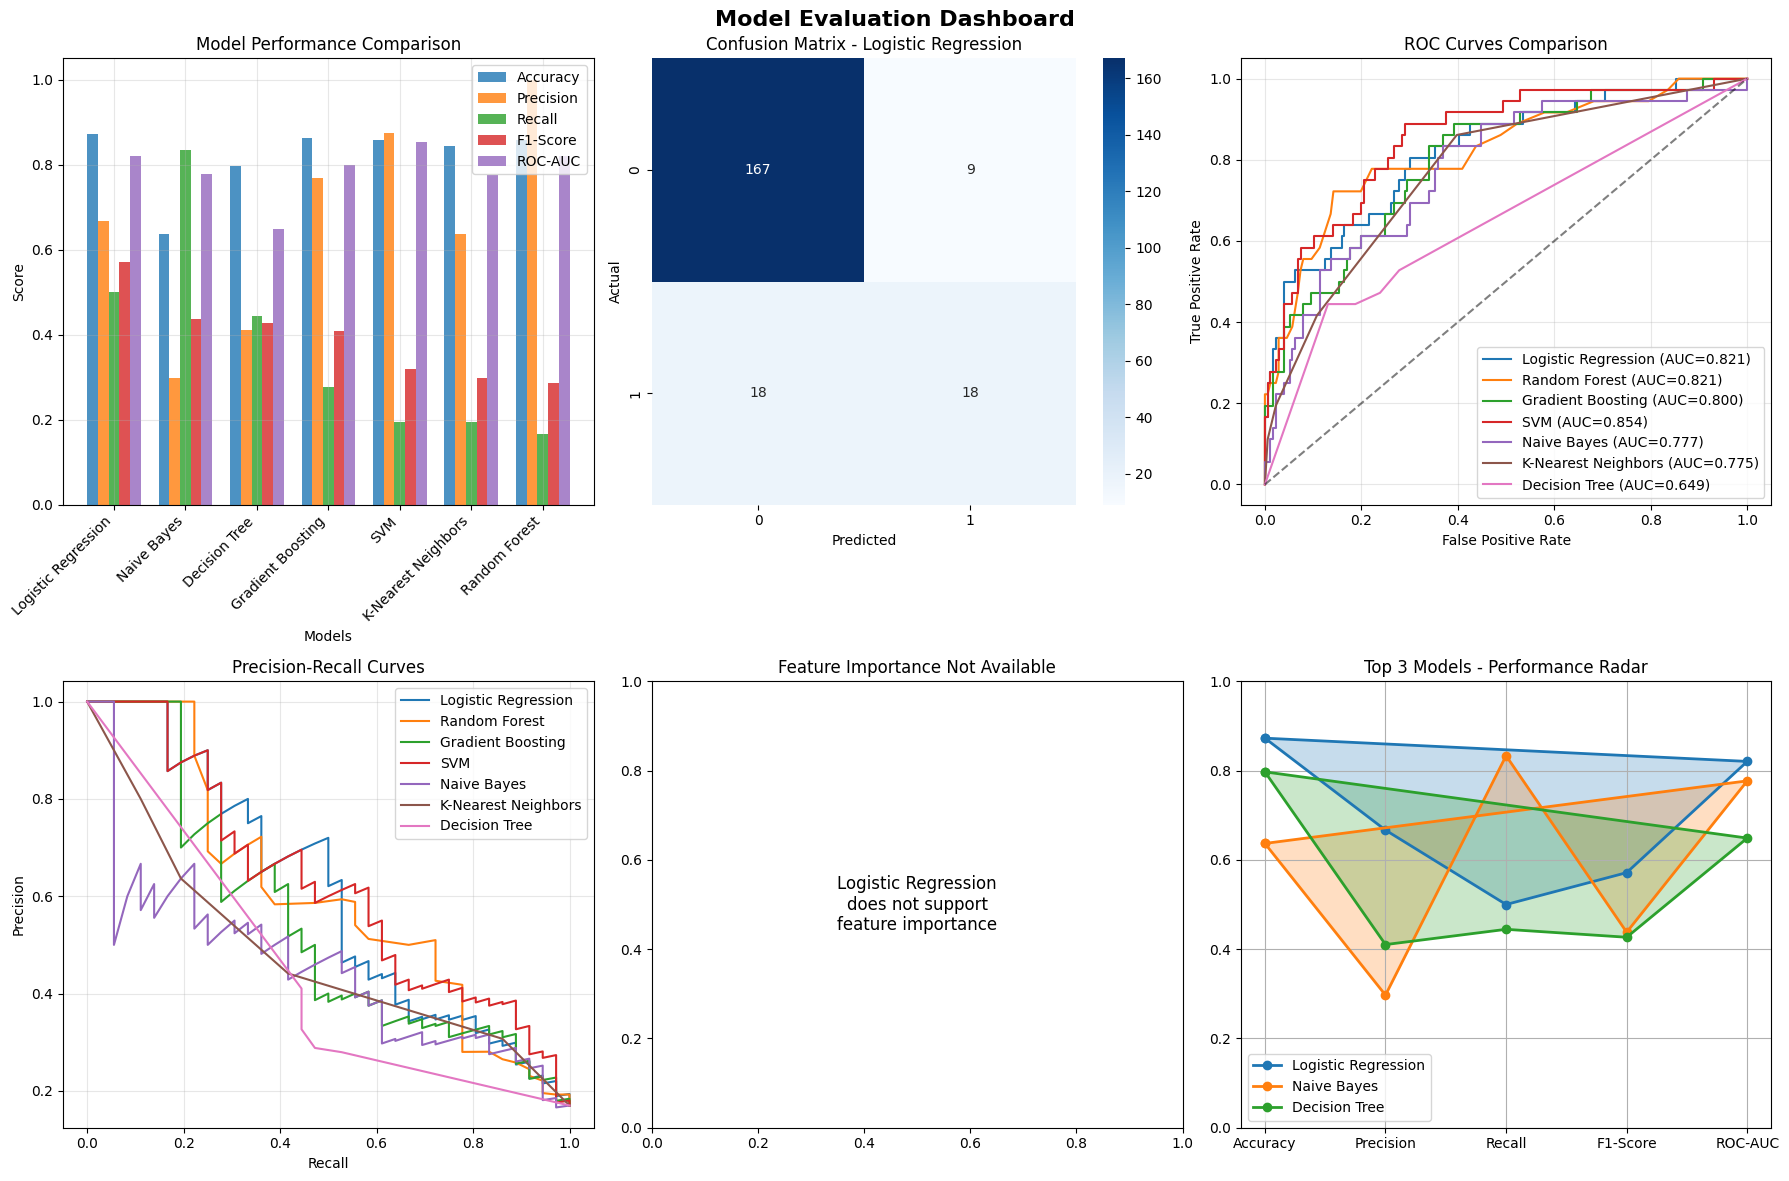

In [26]:
# ===============================
# 3. DETAILED EVALUATION VISUALIZATIONS
# ===============================
print("\n" + "="*60)
print("3. DETAILED EVALUATION VISUALIZATIONS")
print("="*60)

# Create comprehensive evaluation plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Evaluation Dashboard', fontsize=16, fontweight='bold')

# 1. Model Comparison Bar Plot
ax1 = axes[0, 0]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(results_df))
width = 0.15

for i, metric in enumerate(metrics):
    values = results_df[metric].values
    ax1.bar(x + i*width, values, width, label=metric, alpha=0.8)

ax1.set_xlabel('Models')
ax1.set_ylabel('Score')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x + width * 2)
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Best Model Confusion Matrix
ax2 = axes[0, 1]
cm = confusion_matrix(best_model_results['y_test'], best_model_results['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title(f'Confusion Matrix - {best_model_name}')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

# 3. ROC Curves
ax3 = axes[0, 2]
for model_name, result in results.items():
    if result['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(result['y_test'], result['y_pred_proba'])
        ax3.plot(fpr, tpr, label=f"{model_name} (AUC={result['roc_auc']:.3f})")

ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curves Comparison')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Precision-Recall Curves
ax4 = axes[1, 0]
for model_name, result in results.items():
    if result['y_pred_proba'] is not None:
        precision_curve, recall_curve, _ = precision_recall_curve(result['y_test'], result['y_pred_proba'])
        ax4.plot(recall_curve, precision_curve, label=model_name)

ax4.set_xlabel('Recall')
ax4.set_ylabel('Precision')
ax4.set_title('Precision-Recall Curves')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Feature Importance (for tree-based best model)
ax5 = axes[1, 1]
if hasattr(best_model_results['model'], 'feature_importances_'):
    feature_names = best_model_results['X_test'].columns
    importance = best_model_results['model'].feature_importances_

    # Get top 15 features
    top_indices = np.argsort(importance)[-15:]
    top_importance = importance[top_indices]
    top_features = [feature_names[i] for i in top_indices]

    ax5.barh(range(len(top_features)), top_importance)
    ax5.set_yticks(range(len(top_features)))
    ax5.set_yticklabels(top_features)
    ax5.set_xlabel('Feature Importance')
    ax5.set_title(f'Top 15 Features - {best_model_name}')
else:
    ax5.text(0.5, 0.5, f'{best_model_name}\ndoes not support\nfeature importance',
             ha='center', va='center', transform=ax5.transAxes, fontsize=12)
    ax5.set_title('Feature Importance Not Available')

# 6. Model Metrics Radar Chart
ax6 = axes[1, 2]
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
top_3_models = results_df.head(3)

angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for idx, (_, row) in enumerate(top_3_models.iterrows()):
    values = [row[cat] for cat in categories]
    values += values[:1]
    ax6.plot(angles, values, 'o-', linewidth=2, label=row['Model'])
    ax6.fill(angles, values, alpha=0.25)

ax6.set_xticks(angles[:-1])
ax6.set_xticklabels(categories)
ax6.set_ylim(0, 1)
ax6.set_title('Top 3 Models - Performance Radar')
ax6.legend()
ax6.grid(True)

plt.tight_layout()
plt.show()




In [27]:
# ===============================
# 4. HYPERPARAMETER TUNING (Best Model)
# ===============================
print("\n" + "="*60)
print("4. HYPERPARAMETER TUNING")
print("="*60)

print(f"Performing hyperparameter tuning for {best_model_name}...")

# Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.01],
        'max_depth': [3, 5, 7]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    }
}

# Get appropriate dataset for best model
X_train_best, X_test_best, y_train_best, y_test_best, _ = get_best_dataset_for_model(best_model_name)

if best_model_name in param_grids:
    # Perform grid search
    grid_search = GridSearchCV(
        estimator=models[best_model_name],
        param_grid=param_grids[best_model_name],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    grid_search.fit(X_train_best, y_train_best)

    # Get best model
    best_tuned_model = grid_search.best_estimator_

    # Evaluate tuned model
    y_pred_tuned = best_tuned_model.predict(X_test_best)
    y_pred_proba_tuned = best_tuned_model.predict_proba(X_test_best)[:, 1] if hasattr(best_tuned_model, 'predict_proba') else None

    # Calculate metrics for tuned model
    tuned_accuracy = accuracy_score(y_test_best, y_pred_tuned)
    tuned_precision = precision_score(y_test_best, y_pred_tuned)
    tuned_recall = recall_score(y_test_best, y_pred_tuned)
    tuned_f1 = f1_score(y_test_best, y_pred_tuned)
    tuned_roc_auc = roc_auc_score(y_test_best, y_pred_proba_tuned) if y_pred_proba_tuned is not None else None

    print(f"✓ Hyperparameter tuning completed!")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"\nPerformance comparison:")
    print(f"{'Metric':<15} {'Original':<10} {'Tuned':<10} {'Improvement':<12}")
    print("-" * 50)
    print(f"{'Accuracy':<15} {best_model_results['accuracy']:<10.4f} {tuned_accuracy:<10.4f} {tuned_accuracy - best_model_results['accuracy']:+.4f}")
    print(f"{'Precision':<15} {best_model_results['precision']:<10.4f} {tuned_precision:<10.4f} {tuned_precision - best_model_results['precision']:+.4f}")
    print(f"{'Recall':<15} {best_model_results['recall']:<10.4f} {tuned_recall:<10.4f} {tuned_recall - best_model_results['recall']:+.4f}")
    print(f"{'F1-Score':<15} {best_model_results['f1_score']:<10.4f} {tuned_f1:<10.4f} {tuned_f1 - best_model_results['f1_score']:+.4f}")
    if tuned_roc_auc and best_model_results['roc_auc']:
        print(f"{'ROC-AUC':<15} {best_model_results['roc_auc']:<10.4f} {tuned_roc_auc:<10.4f} {tuned_roc_auc - best_model_results['roc_auc']:+.4f}")

    # Update best model if tuned version is better
    if tuned_f1 > best_model_results['f1_score']:
        print(f"\n🎉 Tuned model performs better! Using tuned version as final model.")
        final_model = best_tuned_model
        final_predictions = y_pred_tuned
        final_probabilities = y_pred_proba_tuned
        final_metrics = {
            'accuracy': tuned_accuracy,
            'precision': tuned_precision,
            'recall': tuned_recall,
            'f1_score': tuned_f1,
            'roc_auc': tuned_roc_auc
        }
    else:
        print(f"\n📊 Original model performs better. Using original version as final model.")
        final_model = best_model_results['model']
        final_predictions = best_model_results['y_pred']
        final_probabilities = best_model_results['y_pred_proba']
        final_metrics = {
            'accuracy': best_model_results['accuracy'],
            'precision': best_model_results['precision'],
            'recall': best_model_results['recall'],
            'f1_score': best_model_results['f1_score'],
            'roc_auc': best_model_results['roc_auc']
        }
else:
    print(f"Hyperparameter tuning not configured for {best_model_name}")
    final_model = best_model_results['model']
    final_predictions = best_model_results['y_pred']
    final_probabilities = best_model_results['y_pred_proba']
    final_metrics = {
        'accuracy': best_model_results['accuracy'],
        'precision': best_model_results['precision'],
        'recall': best_model_results['recall'],
        'f1_score': best_model_results['f1_score'],
        'roc_auc': best_model_results['roc_auc']
    }


4. HYPERPARAMETER TUNING
Performing hyperparameter tuning for Logistic Regression...
✓ Hyperparameter tuning completed!
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Performance comparison:
Metric          Original   Tuned      Improvement 
--------------------------------------------------
Accuracy        0.8726     0.8679     -0.0047
Precision       0.6667     0.6429     -0.0238
Recall          0.5000     0.5000     +0.0000
F1-Score        0.5714     0.5625     -0.0089
ROC-AUC         0.8205     0.8134     -0.0071

📊 Original model performs better. Using original version as final model.


In [28]:
# ===============================
# 5. FINAL MODEL EVALUATION
# ===============================
print("\n" + "="*60)
print("5. FINAL MODEL EVALUATION")
print("="*60)

print(f"FINAL MODEL: {best_model_name}")
print("="*40)

# Classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test_best, final_predictions, target_names=['Stayed', 'Left']))

# Cross-validation scores
cv_scores = cross_val_score(final_model, X_train_best, y_train_best, cv=5, scoring='f1')
print(f"\nCross-Validation F1-Scores: {cv_scores}")
print(f"Mean CV F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Business metrics
cm = confusion_matrix(y_test_best, final_predictions)
tn, fp, fn, tp = cm.ravel()

print(f"\nBusiness Impact Analysis:")
print(f"True Positives (Correctly predicted leavers): {tp}")
print(f"False Negatives (Missed leavers): {fn}")
print(f"False Positives (Incorrectly flagged as leavers): {fp}")
print(f"True Negatives (Correctly predicted stayers): {tn}")

# Calculate business metrics
total_actual_leavers = tp + fn
total_predicted_leavers = tp + fp
if total_actual_leavers > 0:
    retention_capture_rate = (tp / total_actual_leavers) * 100
    print(f"\nRetention Capture Rate: {retention_capture_rate:.1f}% of actual leavers identified")

if total_predicted_leavers > 0:
    precision_rate = (tp / total_predicted_leavers) * 100
    print(f"Precision Rate: {precision_rate:.1f}% of flagged employees actually left")


5. FINAL MODEL EVALUATION
FINAL MODEL: Logistic Regression

Detailed Classification Report:
              precision    recall  f1-score   support

      Stayed       0.90      0.95      0.93       176
        Left       0.67      0.50      0.57        36

    accuracy                           0.87       212
   macro avg       0.78      0.72      0.75       212
weighted avg       0.86      0.87      0.87       212


Cross-Validation F1-Scores: [0.53061224 0.42553191 0.48888889 0.48       0.52173913]
Mean CV F1-Score: 0.4894 (+/- 0.0744)

Business Impact Analysis:
True Positives (Correctly predicted leavers): 18
False Negatives (Missed leavers): 18
False Positives (Incorrectly flagged as leavers): 9
True Negatives (Correctly predicted stayers): 167

Retention Capture Rate: 50.0% of actual leavers identified
Precision Rate: 66.7% of flagged employees actually left


In [35]:
# ===============================
# SAVE RESULTS
# ===============================
print("\n" + "="*60)
print("SAVE RESULTS")
print("="*60)

import os
from datetime import datetime

# Timestamped results folder
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
results_dir = f"hr_attrition_results_{timestamp}"

# Create subdirectories
os.makedirs(f"{results_dir}/models", exist_ok=True)
os.makedirs(f"{results_dir}/data", exist_ok=True)
os.makedirs(f"{results_dir}/reports", exist_ok=True)

print(f"✓ Results directory created: {results_dir}")

# 1. Save the final selected model
model_filename = f"{results_dir}/models/final_model_{best_model_name.lower().replace(' ', '_')}.pkl"
joblib.dump(final_model, model_filename)
print(f"✓ Final model saved: {model_filename}")

# 2. Save all trained models
for model_name, model in trained_models.items():
    model_file = f"{results_dir}/models/{model_name.lower().replace(' ', '_')}.pkl"
    joblib.dump(model, model_file)
print(f"✓ All {len(trained_models)} models saved")

# 3. Save preprocessors
if 'scaler_label' in globals():
    joblib.dump(scaler_label, f"{results_dir}/models/scaler_label.pkl")
if 'scaler_onehot' in globals():
    joblib.dump(scaler_onehot, f"{results_dir}/models/scaler_onehot.pkl")
if 'label_encoders' in globals():
    joblib.dump(label_encoders, f"{results_dir}/models/label_encoders.pkl")
print("✓ Preprocessors saved")

# 4. Save model comparison results
results_df.to_csv(f"{results_dir}/reports/model_comparison.csv", index=False)
print("✓ Model comparison saved")

# 5. Save final predictions
predictions_df = pd.DataFrame({
    'actual': y_test_best,
    'predicted': final_predictions,
    'probability': final_probabilities if final_probabilities is not None else np.nan
})
predictions_df.to_csv(f"{results_dir}/reports/final_predictions.csv", index=False)
print("✓ Final predictions saved")

# 6. Save detailed evaluation report
report_content = f"""
HR EMPLOYEE ATTRITION - MODEL EVALUATION REPORT
Generated: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

DATASET SUMMARY:
- Total samples: {len(df_processed)}
- Training samples: {len(X_train_best)}
- Test samples: {len(X_test_best)}
- Features: {X_train_best.shape[1]}
- Attrition rate: {(y_train_best.sum()/len(y_train_best)*100):.2f}%

FINAL MODEL PERFORMANCE:
- Model: {best_model_name}
- Encoding: {best_model_results['encoding']}
- Accuracy: {final_metrics['accuracy']:.4f}
- Precision: {final_metrics['precision']:.4f}
- Recall: {final_metrics['recall']:.4f}
- F1-Score: {final_metrics['f1_score']:.4f}
- ROC-AUC: {final_metrics['roc_auc']:.4f}

CONFUSION MATRIX:
True Negatives: {tn}
False Positives: {fp}
False Negatives: {fn}
True Positives: {tp}

BUSINESS IMPACT:
- Retention Capture Rate: {retention_capture_rate:.1f}%
- Precision Rate: {precision_rate:.1f}%

CROSS-VALIDATION:
- Mean F1-Score: {cv_scores.mean():.4f}
- Standard Deviation: {cv_scores.std():.4f}

RECOMMENDATIONS:
1. Deploy model for real-time attrition prediction
2. Focus retention efforts on high-risk employees (probability > 0.5)
3. Monitor model performance monthly and retrain if needed
4. Consider feature engineering for improved performance
5. Implement A/B testing for retention strategies
"""
with open(f"{results_dir}/reports/evaluation_report.txt", "w") as f:
    f.write(report_content)
print("✓ Detailed evaluation report saved")

# 7. Save feature importance (if available)
if hasattr(final_model, 'feature_importances_'):
    feature_importance_df = pd.DataFrame({
        'feature': X_train_best.columns,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=False)

    feature_importance_df.to_csv(f"{results_dir}/reports/feature_importance.csv", index=False)
    print("✓ Feature importance saved")

# 8. Save README
readme_content = f"""
# HR Employee Attrition Prediction Results

This directory contains the complete results of the HR employee attrition prediction analysis.

## Directory Structure:
- `models/`: Trained machine learning models and preprocessors
- `data/`: Processed datasets (if saved)
- `reports/`: Analysis reports and predictions

## Key Files:
- `final_model_{best_model_name.lower().replace(' ', '_')}.pkl`: Best performing model
- `model_comparison.csv`: Performance comparison of all models
- `final_predictions.csv`: Test set predictions
- `evaluation_report.txt`: Detailed analysis report
- `feature_importance.csv`: Feature importance rankings (if available)

## Best Model: {best_model_name}
- F1-Score: {final_metrics['f1_score']:.4f}
- Accuracy: {final_metrics['accuracy']:.4f}
- ROC-AUC: {final_metrics['roc_auc']:.4f}

## Usage:
To load and use the final model:
```python
import joblib
model = joblib.load('models/final_model_{best_model_name.lower().replace(' ', '_')}.pkl')
predictions = model.predict(X_new)
Generated: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
"""
with open(f"{results_dir}/README.md", "w") as f:
  f.write(readme_content)
print("✓ README file created")

# ===============================
# SAVE PREPROCESSED DATA
# ===============================
print("\n" + "="*50)
print("SAVE PREPROCESSED DATA")
print("="*50)

# Set to True if you want to save the preprocessed data
save_data = True

if save_data:
    import joblib

    # Simpan ke dalam folder hasil akhir (subfolder data/)
    preprocessed_data_dir = f"{results_dir}/data"
    os.makedirs(preprocessed_data_dir, exist_ok=True)

    # Save label encoded version
    X_train_label.to_csv(f'{preprocessed_data_dir}/X_train_label_encoded.csv', index=False)
    X_test_label.to_csv(f'{preprocessed_data_dir}/X_test_label_encoded.csv', index=False)
    y_train_label.to_csv(f'{preprocessed_data_dir}/y_train.csv', index=False)
    y_test_label.to_csv(f'{preprocessed_data_dir}/y_test.csv', index=False)

    # Save one-hot encoded version
    X_train_onehot.to_csv(f'{preprocessed_data_dir}/X_train_onehot_encoded.csv', index=False)
    X_test_onehot.to_csv(f'{preprocessed_data_dir}/X_test_onehot_encoded.csv', index=False)

    # Save scalers and encoders
    joblib.dump(scaler_label, f'{results_dir}/models/scaler_label_encoded.pkl')
    joblib.dump(scaler_onehot, f'{results_dir}/models/scaler_onehot_encoded.pkl')
    joblib.dump(label_encoders, f'{results_dir}/models/label_encoders.pkl')

    print("✓ Preprocessed data and objects have been saved successfully.")
else:
    print("Saving skipped. Set 'save_data = True' to enable saving.")

# Buat file zip dari folder hasil
shutil.make_archive(results_dir, 'zip', results_dir)

# Unduh file zip
files.download(f"{results_dir}.zip")


SAVE RESULTS
✓ Results directory created: hr_attrition_results_20250529_110042
✓ Final model saved: hr_attrition_results_20250529_110042/models/final_model_logistic_regression.pkl
✓ All 7 models saved
✓ Preprocessors saved
✓ Model comparison saved
✓ Final predictions saved
✓ Detailed evaluation report saved
✓ README file created

SAVE PREPROCESSED DATA
✓ Preprocessed data and objects have been saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
# ===============================
# 7. FINAL SUMMARY
# ===============================
print("\n" + "="*60)
print("7. FINAL SUMMARY")
print("="*60)

print("🎉 MACHINE LEARNING PIPELINE COMPLETED SUCCESSFULLY!")
print("\n📊 FINAL RESULTS:")
print(f"   Best Model: {best_model_name}")
print(f"   F1-Score: {final_metrics['f1_score']:.4f}")
print(f"   Accuracy: {final_metrics['accuracy']:.4f}")
print(f"   ROC-AUC: {final_metrics['roc_auc']:.4f}")

print(f"\n💾 RESULTS SAVED TO: {results_dir}/")
print("   - Trained models")
print("   - Predictions and probabilities")
print("   - Performance metrics")
print("   - Detailed evaluation report")
print("   - Feature importance (if available)")

print(f"\n🚀 NEXT STEPS:")
print("   1. Review the detailed evaluation report")
print("   2. Analyze feature importance for business insights")
print("   3. Deploy model for real-time predictions")
print("   4. Set up monitoring and retraining schedule")
print("   5. Implement retention strategies for high-risk employees")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)


7. FINAL SUMMARY
🎉 MACHINE LEARNING PIPELINE COMPLETED SUCCESSFULLY!

📊 FINAL RESULTS:
   Best Model: Logistic Regression
   F1-Score: 0.5714
   Accuracy: 0.8726
   ROC-AUC: 0.8205

💾 RESULTS SAVED TO: hr_attrition_results_20250529_110042/
   - Trained models
   - Predictions and probabilities
   - Performance metrics
   - Detailed evaluation report
   - Feature importance (if available)

🚀 NEXT STEPS:
   1. Review the detailed evaluation report
   2. Analyze feature importance for business insights
   3. Deploy model for real-time predictions
   4. Set up monitoring and retraining schedule
   5. Implement retention strategies for high-risk employees

ANALYSIS COMPLETE!


In [37]:
# simple inference

import pandas as pd
import numpy as np
def predict_attrition(employee_data, model, scaler, label_encoders=None, is_onehot=False):
    """
    Makes attrition prediction for new employee data.

    Args:
        employee_data (pd.DataFrame): DataFrame containing the new employee data.
                                      Must have the same columns as the training data.
        model: Trained machine learning model.
        scaler: Fitted StandardScaler used during training.
        label_encoders (dict, optional): Dictionary of fitted LabelEncoders
                                         for categorical columns if label encoding was used.
        is_onehot (bool): True if the model was trained on one-hot encoded data,
                          False if trained on label encoded data.

    Returns:
        tuple: A tuple containing:
            - predictions (np.ndarray): Binary predictions (0 or 1).
            - probabilities (np.ndarray): Predicted probabilities of attrition (class 1).
    """
    # Ensure column order matches training data
    # Load the original training columns used by the final model
    # This requires the training data structure to be available or saved

    # For this example, we'll assume X_train_best (from the notebook) is available
    # In a real deployment scenario, you would save and load these columns

    if 'X_train_best' not in globals():
        print("Error: Training data structure (X_train_best) not found.")
        print("Please run the data preprocessing steps first.")
        return None, None

    train_cols = X_train_best.columns

    # Preprocess new data
    # Handle missing values (using strategies from training)
    # Note: Imputers should also be saved and loaded in a real deployment
    # For this example, we'll use the imputers created earlier if they exist

    if 'numeric_imputer' in globals() and 'categorical_imputer' in globals():
        numeric_missing = [col for col in employee_data.columns if col in missing_summary.index and col in employee_data.select_dtypes(include=np.number).columns]
        categorical_missing = [col for col in employee_data.columns if col in missing_summary.index and col in employee_data.select_dtypes(include='object').columns]

        if numeric_missing:
             employee_data[numeric_missing] = numeric_imputer.transform(employee_data[numeric_missing])
        if categorical_missing:
             employee_data[categorical_missing] = categorical_imputer.transform(employee_data[categorical_missing])
    else:
        print("Warning: Imputers not found. Assuming no missing values or handling is external.")

    # Remove uninformative columns (matching training)
    # uninformative_cols was defined earlier
    employee_data = employee_data.drop(columns=uninformative_cols, errors='ignore')

    # Encode categorical variables
    if not is_onehot: # Label Encoding
        if label_encoders is None:
            print("Error: Label encoders not provided for label encoded model.")
            return None, None
        for col in categorical_cols:
            if col in employee_data.columns and col in label_encoders:
                 # Use transform, not fit_transform
                 employee_data[col] = label_encoders[col].transform(employee_data[col])
            elif col in employee_data.columns:
                 # Handle unseen categories if necessary (this is a simple example)
                 # A robust approach might map to a specific value or raise an error
                 print(f"Warning: Label encoder not found for column '{col}'. Skipping encoding for this column.")

        # Ensure all numeric columns (including encoded ones) are numeric type
        for col in employee_data.columns:
            if col != 'Attrition': # Exclude target if present
                employee_data[col] = pd.to_numeric(employee_data[col], errors='coerce') # Coerce errors to NaN

        # Simple imputation for any NaNs created by coercion
        employee_data.fillna(employee_data.median(), inplace=True)


    else: # One-Hot Encoding
         # Need to handle unseen categories and ensure all trained columns are present
         # This is a simplified OHE for inference; a robust method uses the fitted OneHotEncoder object
         # For this example, we'll use get_dummies and realign columns
         employee_data = pd.get_dummies(employee_data, columns=categorical_cols, drop_first=True)

         # Align columns - add missing columns (fill with 0) and drop extra ones
         missing_cols = set(train_cols) - set(employee_data.columns)
         for c in missing_cols:
             employee_data[c] = 0
         # Ensure the order of columns remains the same
         employee_data = employee_data[train_cols]


    # Feature Scaling
    X_new_scaled = scaler.transform(employee_data)

    # Make predictions
    predictions = model.predict(X_new_scaled)

    # Get probabilities
    probabilities = None
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(X_new_scaled)[:, 1] # Probability of class 1 (Attrition=Yes)

    return predictions, probabilities

# Example Usage (assuming final_model, scaler_onehot/scaler_label,
# label_encoders, X_train_best, and the original df structure are in the environment)

# Create a sample new employee DataFrame (replace with actual new data)
# Make sure column names and types match the original data BEFORE preprocessing
new_employee_data = {
    'Age': [30, 45, 28],
    'Attrition': [np.nan, np.nan, np.nan], # Attrition is the target, won't be used for prediction input
    'BusinessTravel': ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'],
    'DailyRate': [1102, 500, 1500],
    'Department': ['Sales', 'Research & Development', 'Sales'],
    'DistanceFromJob': [1, 10, 2],
    'Education': [2, 3, 4],
    'EducationField': ['Life Sciences', 'Medical', 'Marketing'],
    'EmployeeCount': [1, 1, 1], # Uninformative column, will be dropped
    'EmployeeId': [2000, 2001, 2002], # Uninformative column, will be dropped
    'EnvironmentSatisfaction': [2, 4, 3],
    'Gender': ['Female', 'Male', 'Female'],
    'HourlyRate': [94, 60, 80],
    'JobInvolvement': [3, 2, 4],
    'JobLevel': [2, 3, 1],
    'JobRole': ['Sales Executive', 'Research Scientist', 'Sales Representative'],
    'JobSatisfaction': [4, 2, 3],
    'MaritalStatus': ['Single', 'Married', 'Single'],
    'MonthlyIncome': [5993, 8000, 3000],
    'MonthlyRate': [19479, 15000, 20000],
    'NumCompaniesWorked': [8, 1, 5],
    'Over18': ['Y', 'Y', 'Y'], # Uninformative column, will be dropped
    'OverTime': ['Yes', 'No', 'Yes'],
    'PercentSalaryHike': [11, 15, 18],
    'PerformanceRating': [3, 4, 4],
    'RelationshipSatisfaction': [1, 3, 4],
    'StandardHours': [80, 80, 80], # Uninformative column, will be dropped
    'StockOptionLevel': [0, 1, 0],
    'TotalWorkingYears': [8, 10, 5],
    'TrainingTimesLastYear': [0, 3, 2],
    'WorkLifeBalance': [1, 3, 4],
    'YearsAtCompany': [6, 5, 3],
    'YearsInCurrentRole': [4, 3, 2],
    'YearsSinceLastPromotion': [0, 1, 1],
    'YearsWithCurrManager': [5, 4, 2]
}

new_employees_df = pd.DataFrame(new_employee_data)

print("New employee data before preprocessing:")
print(new_employees_df)

# Assuming 'final_model' is the best model selected and potentially tuned
# and 'best_model_results' contains its encoding type and scaler
# We also need the appropriate scaler (label or onehot) and label_encoders if used

model_encoding_type = best_model_results['encoding']

if model_encoding_type == 'Label Encoded':
    model_scaler = scaler_label
    model_label_encoders = label_encoders
    is_onehot_model = False
    print("\nUsing Label Encoded model and preprocessors...")
elif model_encoding_type == 'One-Hot Encoded':
    model_scaler = scaler_onehot
    model_label_encoders = None # No label encoders for OHE model
    is_onehot_model = True
    print("\nUsing One-Hot Encoded model and preprocessors...")
else:
    print("Error: Unknown model encoding type.")
    model_scaler = None
    model_label_encoders = None
    is_onehot_model = False


if final_model and model_scaler:
    predictions, probabilities = predict_attrition(
        new_employees_df.copy(), # Pass a copy to avoid modifying the original df
        final_model,
        model_scaler,
        model_label_encoders,
        is_onehot_model
    )

    if predictions is not None:
        print("\n--- INFERENCE RESULTS ---")
        print(f"Using Model: {best_model_name} ({model_encoding_type})")

        inference_results = pd.DataFrame({
            'Employee': new_employees_df['EmployeeId'],
            'Predicted_Attrition': predictions,
            'Probability_of_Attrition': probabilities
        })

        print("\nInference Predictions:")
        print(inference_results)

        # Add human-readable interpretation
        inference_results['Prediction_Text'] = inference_results['Predicted_Attrition'].apply(
            lambda x: 'Will Leave' if x == 1 else 'Will Stay'
        )

        print("\nInference Results (Interpreted):")
        print(inference_results[['Employee', 'Prediction_Text', 'Probability_of_Attrition']])

        # Identify high-risk employees (e.g., probability > 0.5)
        high_risk_employees = inference_results[inference_results['Probability_of_Attrition'] > 0.5]
        if not high_risk_employees.empty:
            print("\n--- HIGH-RISK EMPLOYEES ---")
            print(high_risk_employees[['Employee', 'Probability_of_Attrition', 'Prediction_Text']])
        else:
            print("\nNo high-risk employees identified based on a 0.5 probability threshold.")

else:
    print("\nInference skipped: Final model or scaler not available.")



New employee data before preprocessing:
   Age  Attrition     BusinessTravel  DailyRate              Department  \
0   30        NaN      Travel_Rarely       1102                   Sales   
1   45        NaN  Travel_Frequently        500  Research & Development   
2   28        NaN         Non-Travel       1500                   Sales   

   DistanceFromJob  Education EducationField  EmployeeCount  EmployeeId  ...  \
0                1          2  Life Sciences              1        2000  ...   
1               10          3        Medical              1        2001  ...   
2                2          4      Marketing              1        2002  ...   

   RelationshipSatisfaction StandardHours  StockOptionLevel  \
0                         1            80                 0   
1                         3            80                 1   
2                         4            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0     